In [165]:
import pandas as pd
import numpy as np

# Read cleaned CSV
df = pd.read_csv('us_stock_valuation_clean.csv')

# Keep a copy of the raw rows (optional)
df_raw = df.copy()

# Parse dates and ensure numeric price
df['Price Dates'] = pd.to_datetime(df['Price Dates'], dayfirst=True, errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Calendar Year'] = pd.to_numeric(df['Calendar Year'], errors='coerce').astype('Int64')

# Drop rows without a valid date or price
df = df.dropna(subset=['Price Dates', 'Price', 'Calendar Year']).copy()

# Select the last observed snapshot within each (Ticker, Calendar Year)
# This picks the row with the maximum Price Dates per group
idx_last = df.groupby(['Ticker', 'Calendar Year'])['Price Dates'].idxmax()
df_annual = (
    df.loc[idx_last]
      .sort_values(['Ticker', 'Calendar Year'])
      .reset_index(drop=True)
)

# Use the annual "last observed" dataset as df for the rest of the notebook
df = df_annual

df.head()

,Ticker,Company Name,Sector,Industry,Beta,Calendar Year,Period,Filing Date,Revenue,Cost Of Revenue,...,Interest Coverage Ratio,Price Dates,Price,Market Cap,P/E Ratio,P/S Ratio,Risk Free Rate,Equity Risk Premium,WACC,Avg Market Return
0,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2014,FY,22/12/2014,6.981000e+09,NaN,...,7.35,2015-08-24,34.68,11548439552,23.28,1.65,0.020,0.06,0.073,0.08
1,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2015,FY,21/12/2015,4.038000e+09,1.997000e+09,...,7.91,2016-08-22,47.58,15844140032,39.65,3.92,0.015,0.06,0.079,0.08
2,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2016,FY,20/12/2016,4.202000e+09,2.005000e+09,...,8.54,2017-08-22,62.96,20524959744,44.65,4.88,0.022,0.06,0.078,0.08
3,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2017,FY,21/12/2017,4.472000e+09,2.063000e+09,...,10.65,2018-08-23,65.69,21152180224,30.99,4.73,0.028,0.05,0.078,0.08
4,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2018,FY,20/12/2018,4.914000e+09,2.227000e+09,...,12.37,2019-08-22,71.74,23028539392,73.20,4.69,0.016,0.06,0.078,0.08


In [166]:
assert not df.duplicated(['Ticker', 'Calendar Year']).any(), "Duplicate Ticker–Year found."

# Index the DataFrame by Ticker and Calendar Year
df = df.sort_values(['Ticker', 'Calendar Year'])
df_indexed = df.set_index(['Ticker', 'Calendar Year']).sort_index()

# Quick peek
df_indexed.head(20)

Company Name       Sector  \
Ticker Calendar Year                                              
A      2014              Agilent Technologies Inc.   Healthcare   
       2015              Agilent Technologies Inc.   Healthcare   
       2016              Agilent Technologies Inc.   Healthcare   
       2017              Agilent Technologies Inc.   Healthcare   
       2018              Agilent Technologies Inc.   Healthcare   
       2019              Agilent Technologies Inc.   Healthcare   
       2020              Agilent Technologies Inc.   Healthcare   
       2021              Agilent Technologies Inc.   Healthcare   
       2022              Agilent Technologies Inc.   Healthcare   
       2023              Agilent Technologies Inc.   Healthcare   
AAL    2014           American Airlines Group Inc.  Industrials   
       2015           American Airlines Group Inc.  Industrials   
       2016           American Airlines Group Inc.  Industrials   
       2017           American Airlines Group Inc.  Industrials   
       2018           American Airlines Group Inc.  Industrials   
       2019           American Airlines Group Inc.  Industrials   
       2020           American Airlines Group Inc.  Industrials   
       2021           American Airlines Group Inc.  Industrials   
       2022           American Airlines Group Inc.  Industrials   
       2023           American Airlines Group Inc.  Industrials   

                                               Industry  Beta Period  \
Ticker Calendar Year                                                   
A      2014            Medical - Diagnostics & Research  1.05     FY   
       2015            Medical - Diagnostics & Research  1.05     FY   
       2016            Medical - Diagnostics & Research  1.05     FY   
       2017            Medical - Diagnostics & Research  1.05     FY   
       2018            Medical - Diagnostics & Research  1.05     FY   
       2019            Medical - Diagnostics & Research  1.05     FY   
       2020            Medical - Diagnostics & Research  1.05     FY   
       2021            Medical - Diagnostics & Research  1.05     FY   
       2022            Medical - Diagnostics & Research  1.05     FY   
       2023            Medical - Diagnostics & Research  1.05     FY   
AAL    2014           Airlines, Airports & Air Services  1.45     FY   
       2015           Airlines, Airports & Air Services  1.45     FY   
       2016           Airlines, Airports & Air Services  1.45     FY   
       2017           Airlines, Airports & Air Services  1.45     FY   
       2018           Airlines, Airports & Air Services  1.45     FY   
       2019           Airlines, Airports & Air Services  1.45     FY   
       2020           Airlines, Airports & Air Services  1.45     FY   
       2021           Airlines, Airports & Air Services  1.45     FY   
       2022           Airlines, Airports & Air Services  1.45     FY   
       2023           Airlines, Airports & Air Services  1.45     FY   

                     Filing Date       Revenue  Cost Of Revenue  Net Income  \
Ticker Calendar Year                                                          
A      2014           22/12/2014  6.981000e+09              NaN   497000000   
       2015           21/12/2015  4.038000e+09     1.997000e+09   398000000   
       2016           20/12/2016  4.202000e+09     2.005000e+09   460000000   
       2017           21/12/2017  4.472000e+09     2.063000e+09   684000000   
       2018           20/12/2018  4.914000e+09     2.227000e+09   316000000   
       2019           19/12/2019  5.163000e+09     2.358000e+09  1071000000   
       2020           18/12/2020  5.339000e+09     2.502000e+09   719000000   
       2021           17/12/2021  6.319000e+09     2.912000e+09  1210000000   
       2022           21/12/2022  6.848000e+09     3.126000e+09  1254000000   
       2023           20/12/2023  6.833000e+09     3.368000e+09  1240000000   
AAL    2014           25/02/20

In [167]:
# Derive missing ratios where possible from other columns in the same row
def derive_same_row_inplace(df: pd.DataFrame) -> pd.DataFrame:
    # helper: elementwise safe divide
    def safe_div(num, den):
        return np.where((pd.notna(num)) & (pd.notna(den)) & (den != 0), num / den, np.nan)

    # ---- Exact identities (row-local) ----
    if {"Total Debt","Long-Term Debt","Short-Term Debt"}.issubset(df.columns):
        m = df["Total Debt"].isna()
        df.loc[m, "Total Debt"] = df.loc[m, "Long-Term Debt"] + df.loc[m, "Short-Term Debt"]

    if {"Net Cash","Cash And Short Term Investments","Total Debt"}.issubset(df.columns):
        m = df["Net Cash"].isna()
        df.loc[m, "Net Cash"] = df.loc[m, "Cash And Short Term Investments"] - df.loc[m, "Total Debt"]

    if {"Free Cash Flow","Operating Cash Flow","Capital Expenditure"}.issubset(df.columns):
        m = df["Free Cash Flow"].isna()
        df.loc[m, "Free Cash Flow"] = df.loc[m, "Operating Cash Flow"] - df.loc[m, "Capital Expenditure"]

    # ---- Margins (from row numerators/denominators) ----
    if {"Operating Profit Margin","Operating Income","Revenue"}.issubset(df.columns):
        m = df["Operating Profit Margin"].isna()
        df.loc[m, "Operating Profit Margin"] = safe_div(df.loc[m, "Operating Income"], df.loc[m, "Revenue"])

    if {"Gross Profit Margin","Revenue","Cost Of Revenue"}.issubset(df.columns):
        m = df["Gross Profit Margin"].isna()
        gp = df.loc[m, "Revenue"] - df.loc[m, "Cost Of Revenue"]
        df.loc[m, "Gross Profit Margin"] = safe_div(gp, df.loc[m, "Revenue"])

    # ---- Returns (only if inputs exist on the same row) ----
    if {"Return On Assets","Net Income","Total Assets"}.issubset(df.columns):
        m = df["Return On Assets"].isna()
        df.loc[m, "Return On Assets"] = safe_div(df.loc[m, "Net Income"], df.loc[m, "Total Assets"])

    if {"Return On Equity","Net Income","Total Assets","Total Liabilities"}.issubset(df.columns):
        m = df["Return On Equity"].isna()
        equity = df.loc[m, "Total Assets"] - df.loc[m, "Total Liabilities"]
        df.loc[m, "Return On Equity"] = safe_div(df.loc[m, "Net Income"], equity)

    if {"Return On Invested Capital","NOPAT","Invested Capital"}.issubset(df.columns):
        m = df["Return On Invested Capital"].isna()
        df.loc[m, "Return On Invested Capital"] = safe_div(df.loc[m, "NOPAT"], df.loc[m, "Invested Capital"])

    # ---- Coverage ----
    if "Interest Coverage Ratio" in df.columns:
        # Prefer EBIT if present, else Operating Income
        if {"EBIT","Interest Expense"}.issubset(df.columns):
            m = df["Interest Coverage Ratio"].isna()
            df.loc[m, "Interest Coverage Ratio"] = safe_div(df.loc[m, "EBIT"], df.loc[m, "Interest Expense"])
        elif {"Operating Income","Interest Expense"}.issubset(df.columns):
            m = df["Interest Coverage Ratio"].isna()
            df.loc[m, "Interest Coverage Ratio"] = safe_div(df.loc[m, "Operating Income"], df.loc[m, "Interest Expense"])

    # ---- Valuation ratios (row-local equivalents) ----
    if "P/E Ratio" in df.columns:
        if {"Price","EPS"}.issubset(df.columns):
            m = df["P/E Ratio"].isna()
            df.loc[m, "P/E Ratio"] = safe_div(df.loc[m, "Price"], df.loc[m, "EPS"])
        if {"Market Cap","Net Income"}.issubset(df.columns):
            m = df["P/E Ratio"].isna()
            df.loc[m, "P/E Ratio"] = safe_div(df.loc[m, "Market Cap"], df.loc[m, "Net Income"])

    if "P/S Ratio" in df.columns:
        if {"Price","Revenue Per Share"}.issubset(df.columns):
            m = df["P/S Ratio"].isna()
            df.loc[m, "P/S Ratio"] = safe_div(df.loc[m, "Price"], df.loc[m, "Revenue Per Share"])
        if {"Market Cap","Revenue"}.issubset(df.columns):
            m = df["P/S Ratio"].isna()
            df.loc[m, "P/S Ratio"] = safe_div(df.loc[m, "Market Cap"], df.loc[m, "Revenue"])

    # ---- Revenue Per Share (handy fallback) ----
    if {"Revenue Per Share","Price","P/S Ratio"}.issubset(df.columns):
        m = df["Revenue Per Share"].isna()
        df.loc[m, "Revenue Per Share"] = safe_div(df.loc[m, "Price"], df.loc[m, "P/S Ratio"])

    return df
df = derive_same_row_inplace(df)
missing = df.isnull().sum()
print(missing[missing > 0].to_string())


Revenue                            1
Cost Of Revenue                    3
Total Current Assets               5
Total Assets                       5
Total Current Liabilities          5
Total Liabilities                  5
Long-Term Debt                     4
Short-Term Debt                    4
Total Debt                         4
Depreciation and Amortization      2
Operating Income                   2
Operating Cash Flow                3
Capital Expenditure                2
Cash And Short Term Investments    5
Net Cash                           5
Free Cash Flow                     2
Stock Based Compensation           3
Dividends Paid                     2
Common Stock                       4
Preferred Stock                    4
Retained Earnings                  4
Return On Invested Capital         5
Gross Profit Margin                4
Operating Profit Margin            3
Interest Coverage Ratio            4
Risk Free Rate                     9
Equity Risk Premium                9
W

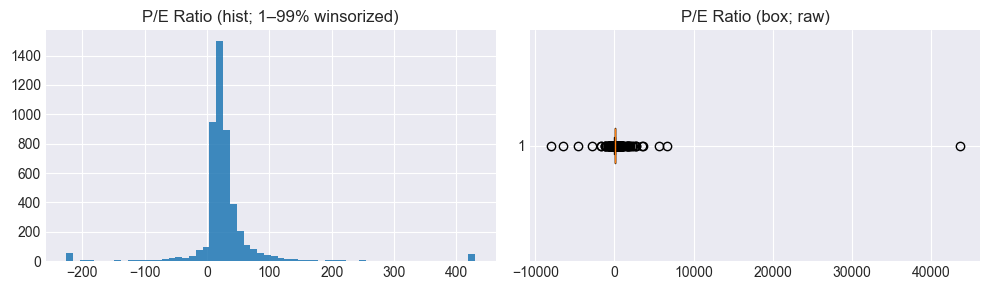

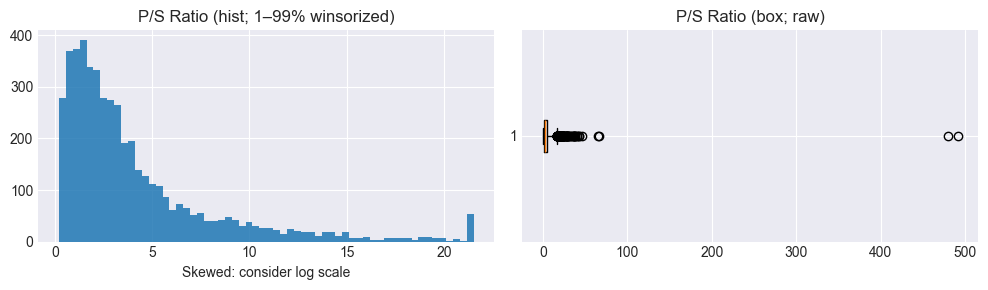

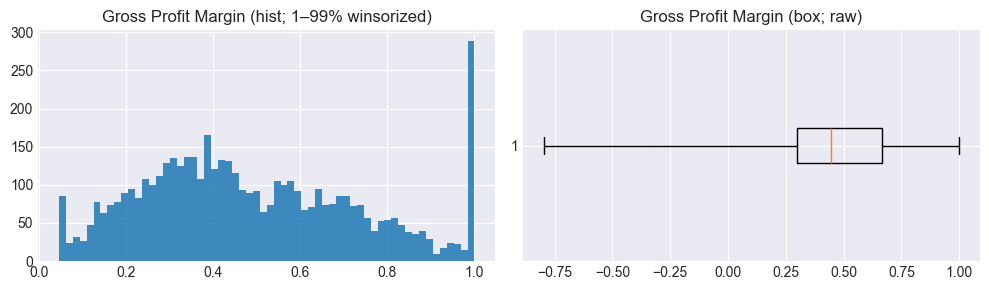

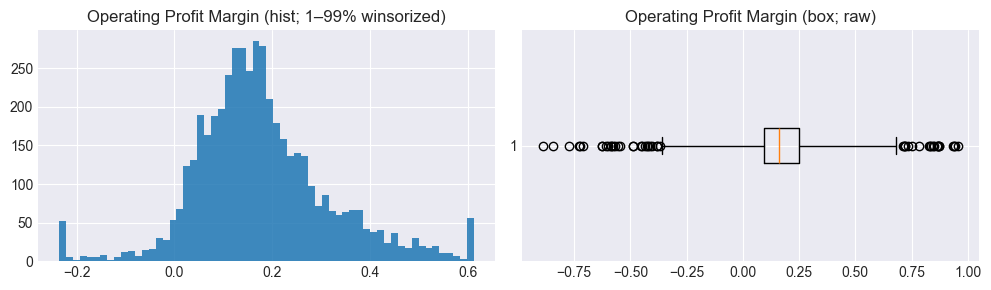

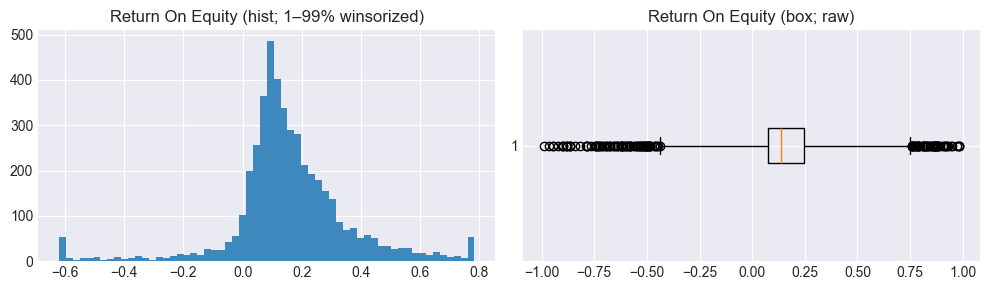

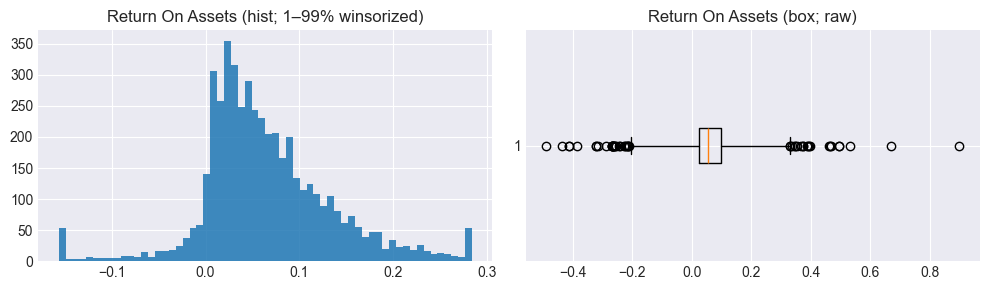

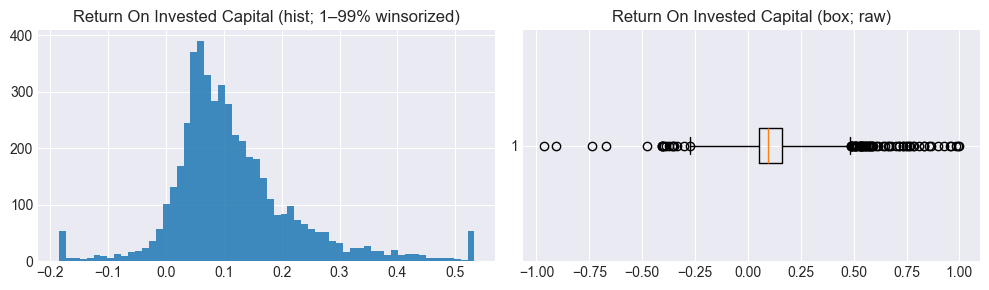

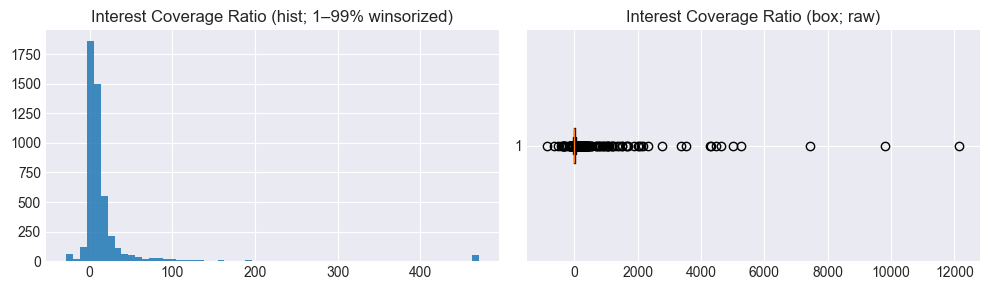

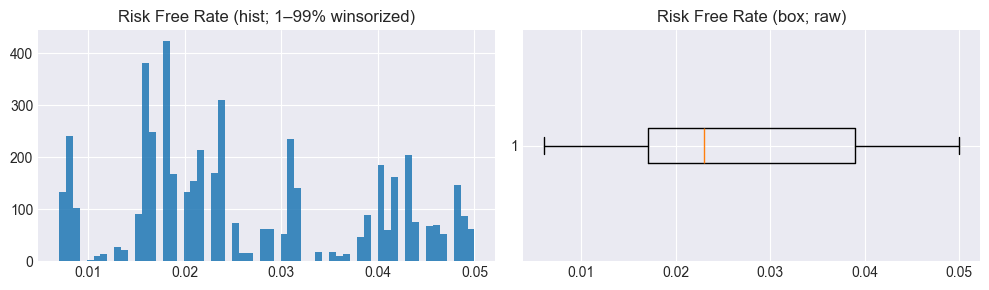

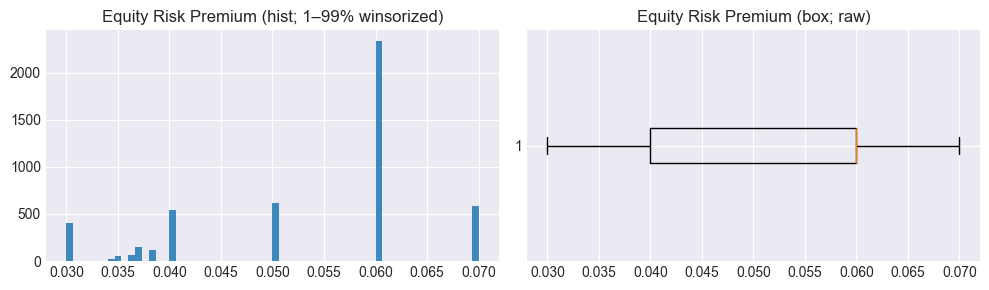

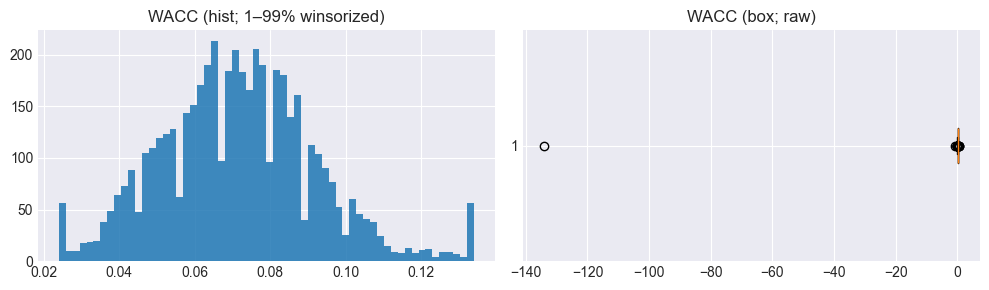

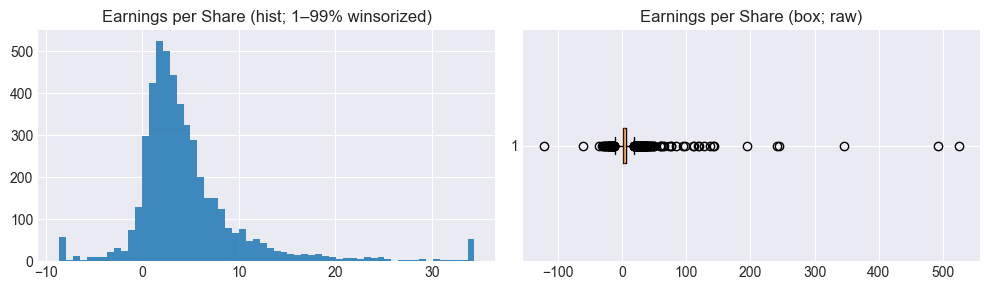

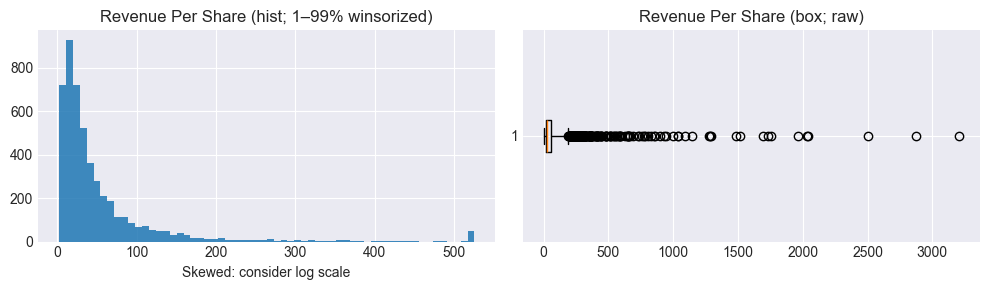

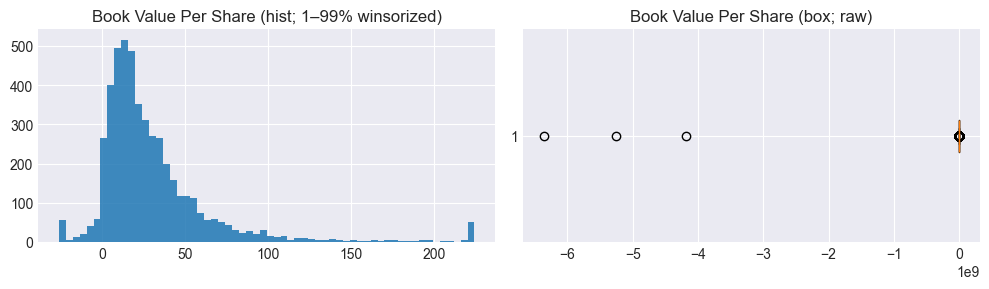

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use the MultiIndex view if available; else build it
if 'df_indexed' in globals():
    D = df_indexed.copy()
else:
    D = df.set_index(['Ticker', 'Calendar Year']).sort_index()

# Columns to analyze (filter to those present)
ratio_cols = [
    'P/E Ratio','P/S Ratio','Gross Profit Margin','Operating Profit Margin',
    'Return On Equity','Return On Assets','Return On Invested Capital',
    'Interest Coverage Ratio','Risk Free Rate','Equity Risk Premium','WACC'
]
per_share = ['Earnings per Share','Revenue Per Share','Book Value Per Share']
time_spike = ['Price','Market Cap','Revenue','Net Income','Operating Income',
              'Operating Cash Flow','Capital Expenditure','Free Cash Flow']

def present(cols): return [c for c in cols if c in D.columns]
ratio_cols, per_share, time_spike = map(present, [ratio_cols, per_share, time_spike])

# --- helper to clean only for plotting (no data changes) ---
RATIO_01 = {'Gross Profit Margin','Operating Profit Margin','Return On Equity',
            'Return On Assets','Return On Invested Capital'}

def _series_for_plot(df_like, col):
    s = pd.to_numeric(df_like[col], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
    if col in RATIO_01:
        if (s > 1.5).mean() > 0.01:   # values look like percentages -> convert
            s = s.where(s <= 1.5, s / 100.0)
        s = s[(s >= -1.0) & (s <= 1.0)]
    return s

def winsorize_series(s: pd.Series, lo=0.01, hi=0.99) -> pd.Series:
    ql, qh = s.quantile([lo, hi])
    return s.clip(lower=ql, upper=qh)

# 1) Univariate: histogram (winsorized) + boxplot (raw)
def plot_univariate(cols, bins=60, lo=0.01, hi=0.99):
    for c in cols:
        s = _series_for_plot(D, c)
        if s.empty:
            continue
        s_win = winsorize_series(s, lo=lo, hi=hi)
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        axes[0].hist(s_win, bins=bins, alpha=0.85)
        axes[0].set_title(f'{c} (hist; {int(lo*100)}–{int(hi*100)}% winsorized)')
        axes[1].boxplot(s, vert=False, whis=3.0, showfliers=True)
        axes[1].set_title(f'{c} (box; raw)')
        if s.min() >= 0 and (s.skew() if hasattr(s, "skew") else 0) > 1:
            axes[0].set_xlabel('Skewed: consider log scale')
        plt.tight_layout()
        plt.show()

# 2) Simple per-ticker time series across years (line plot)
def plot_time_series_for_ticker(cols, ticker, log=False):
    if not isinstance(D.index, pd.MultiIndex) or 'Ticker' not in D.index.names:
        raise ValueError("Expected MultiIndex with level 'Ticker'.")
    if ticker not in D.index.get_level_values('Ticker'):
        print(f"No data for ticker {ticker}")
        return
    dft = D.xs(ticker, level='Ticker').copy()  # index is Calendar Year now
    years = dft.index.to_series().astype(int)
    for c in present(cols):
        s = pd.to_numeric(dft[c], errors='coerce')
        plt.plot(years, s, marker='o', label=c)
    plt.title(f'{ticker}: selected metrics by year')
    plt.xlabel('Calendar Year')
    plt.legend()
    if log:
        plt.yscale('log')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run plots
plot_univariate(ratio_cols + per_share, lo=0.01, hi=0.99)

Using data from year: 2023
Total companies in dataset: 489

Companies with valid Sector data: 489

=== SECTOR DISTRIBUTION BY NUMBER OF COMPANIES ===
Sector
Technology                79
Industrials               73
Financial Services        67
Healthcare                65
Consumer Cyclical         50
Consumer Defensive        31
Utilities                 31
Real Estate               31
Energy                    24
Basic Materials           21
Communication Services    17
Name: count, dtype: int64

=== SECTOR PERCENTAGE DISTRIBUTION ===
Technology: 79 companies (16.16%)
Industrials: 73 companies (14.93%)
Financial Services: 67 companies (13.7%)
Healthcare: 65 companies (13.29%)
Consumer Cyclical: 50 companies (10.22%)
Consumer Defensive: 31 companies (6.34%)
Utilities: 31 companies (6.34%)
Real Estate: 31 companies (6.34%)
Energy: 24 companies (4.91%)
Basic Materials: 21 companies (4.29%)
Communication Services: 17 companies (3.48%)

=== SECTOR DISTRIBUTION BY MARKET CAPITALIZATION ===


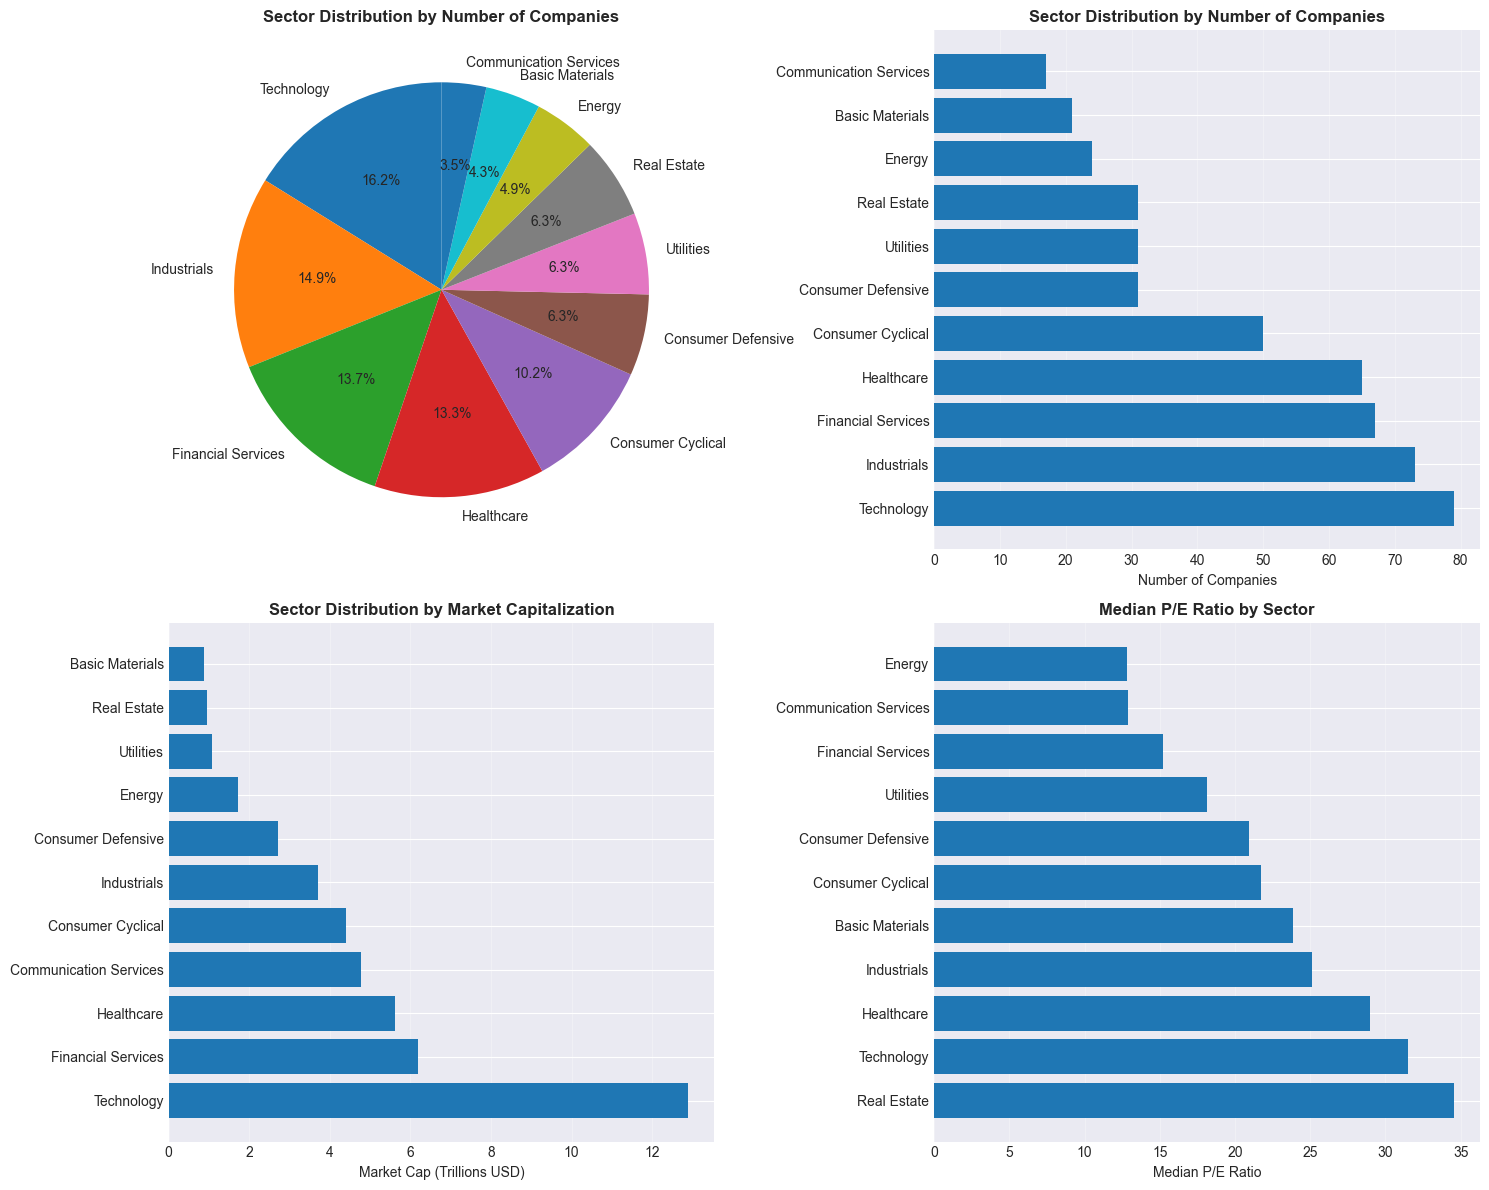

Visualizations complete!


In [169]:
# ============================================================================
# CELL 5: SECTOR COMPOSITION ANALYSIS
# ============================================================================
# Purpose: Analyze portfolio composition by sector and compare sector characteristics
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For sector analysis, we'll use year 2023 data
# This gives us a consistent snapshot across all companies for the same year
target_year = 2023
df_recent = df[df['Calendar Year'] == target_year].copy()

print(f"Using data from year: {target_year}")
print(f"Total companies in dataset: {len(df_recent)}")
print()

# Check if we have Sector column
if 'Sector' not in df_recent.columns:
    print("Warning: 'Sector' column not found in dataset")
else:
    # Remove rows with missing Sector information
    df_recent = df_recent.dropna(subset=['Sector']).copy()
    print(f"Companies with valid Sector data: {len(df_recent)}")
    print()

# ============================================================================
# PART 1: Basic Sector Distribution (Count)
# ============================================================================

# Count how many companies are in each sector
sector_counts = df_recent['Sector'].value_counts().sort_values(ascending=False)
print("=== SECTOR DISTRIBUTION BY NUMBER OF COMPANIES ===")
print(sector_counts)
print()

# Calculate percentage distribution
sector_percentages = (sector_counts / len(df_recent) * 100).round(2)
print("=== SECTOR PERCENTAGE DISTRIBUTION ===")
for sector, count in sector_counts.items():
    pct = sector_percentages[sector]
    print(f"{sector}: {count} companies ({pct}%)")
print()

# ============================================================================
# PART 2: Market Cap Weighted Sector Distribution
# ============================================================================

# Initialize variables for market cap analysis
total_market_cap = 0
sector_mcap = pd.Series(dtype=float)

# Check if Market Cap column exists
if 'Market Cap' in df_recent.columns:
    # Remove rows with missing Market Cap
    df_with_mcap = df_recent.dropna(subset=['Market Cap']).copy()
    
    # Calculate total market cap
    total_market_cap = df_with_mcap['Market Cap'].sum()
    
    # Calculate market cap per sector
    sector_mcap = df_with_mcap.groupby('Sector')['Market Cap'].sum().sort_values(ascending=False)
    
    # Calculate market cap percentage per sector
    sector_mcap_pct = (sector_mcap / total_market_cap * 100).round(2)
    
    print("=== SECTOR DISTRIBUTION BY MARKET CAPITALIZATION ===")
    print(f"Total Market Cap: ${total_market_cap:,.0f}")
    print()
    for sector, mcap in sector_mcap.items():
        pct = sector_mcap_pct[sector]
        print(f"{sector}: ${mcap:,.0f} ({pct}%)")
    print()
else:
    print("Market Cap column not available - skipping market cap weighted analysis")
    print()

# ============================================================================
# PART 3: Sector-Level Statistics
# ============================================================================

# Calculate key metrics by sector
metrics_to_analyze = ['P/E Ratio', 'P/S Ratio', 'Return On Equity', 
                      'Return On Invested Capital', 'Gross Profit Margin', 
                      'Operating Profit Margin']

# Filter to metrics that exist in the dataset
available_metrics = [m for m in metrics_to_analyze if m in df_recent.columns]
print(f"Analyzing metrics: {', '.join(available_metrics)}")
print()

# Calculate statistics for each sector
sector_stats = {}

for sector in df_recent['Sector'].unique():
    sector_data = df_recent[df_recent['Sector'] == sector]
    sector_stats[sector] = {}
    
    for metric in available_metrics:
        # Get non-null values for this metric in this sector
        metric_values = sector_data[metric].dropna()
        
        if len(metric_values) > 0:
            sector_stats[sector][f'{metric}_mean'] = metric_values.mean()
            sector_stats[sector][f'{metric}_median'] = metric_values.median()
            sector_stats[sector][f'{metric}_count'] = len(metric_values)
        else:
            sector_stats[sector][f'{metric}_mean'] = np.nan
            sector_stats[sector][f'{metric}_median'] = np.nan
            sector_stats[sector][f'{metric}_count'] = 0

# Create a summary DataFrame
summary_rows = []
for sector in df_recent['Sector'].unique():
    row = {'Sector': sector}
    row['Company_Count'] = len(df_recent[df_recent['Sector'] == sector])
    
    if 'Market Cap' in df_recent.columns:
        sector_mcap_sum = df_recent[df_recent['Sector'] == sector]['Market Cap'].sum()
        row['Total_Market_Cap'] = sector_mcap_sum
        if total_market_cap > 0:
            row['Market_Cap_Pct'] = (sector_mcap_sum / total_market_cap * 100)
    
    # Add metric statistics
    for metric in available_metrics:
        if sector in sector_stats:
            row[f'{metric}_Mean'] = sector_stats[sector].get(f'{metric}_mean', np.nan)
            row[f'{metric}_Median'] = sector_stats[sector].get(f'{metric}_median', np.nan)
            row[f'{metric}_Count'] = sector_stats[sector].get(f'{metric}_count', 0)
    
    summary_rows.append(row)

sector_summary_df = pd.DataFrame(summary_rows)
sector_summary_df = sector_summary_df.sort_values('Company_Count', ascending=False)

print("=== SECTOR SUMMARY STATISTICS ===")
print(sector_summary_df.to_string(index=False))
print()

# ============================================================================
# PART 4: Visualizations
# ============================================================================

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Sector distribution by count (pie chart)
if len(sector_counts) > 0:
    axes[0, 0].pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Sector Distribution by Number of Companies', fontsize=12, fontweight='bold')

# Plot 2: Sector distribution by count (bar chart)
if len(sector_counts) > 0:
    axes[0, 1].barh(sector_counts.index, sector_counts.values)
    axes[0, 1].set_xlabel('Number of Companies')
    axes[0, 1].set_title('Sector Distribution by Number of Companies', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Sector distribution by market cap (if available)
if 'Market Cap' in df_recent.columns and len(sector_mcap) > 0:
    axes[1, 0].barh(sector_mcap.index, sector_mcap.values / 1e12)  # Convert to trillions
    axes[1, 0].set_xlabel('Market Cap (Trillions USD)')
    axes[1, 0].set_title('Sector Distribution by Market Capitalization', fontsize=12, fontweight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Average P/E Ratio by Sector (if available)
if 'P/E Ratio' in df_recent.columns:
    # Convert P/E Ratio to numeric and remove any invalid values
    df_pe_clean = df_recent.copy()
    df_pe_clean['P/E Ratio'] = pd.to_numeric(df_pe_clean['P/E Ratio'], errors='coerce')
    
    # Use median instead of mean - it's more robust to outliers
    # This way we still show all sectors but outliers don't skew the results
    pe_by_sector = df_pe_clean.groupby('Sector')['P/E Ratio'].median().sort_values(ascending=False)
    pe_by_sector = pe_by_sector.dropna()
    
    # Debug: print what we found
    print(f"P/E Ratio by Sector (Median):")
    print(pe_by_sector)
    print()
    
    if len(pe_by_sector) > 0:
        axes[1, 1].barh(pe_by_sector.index, pe_by_sector.values)
        axes[1, 1].set_xlabel('Median P/E Ratio')
        axes[1, 1].set_title('Median P/E Ratio by Sector', fontsize=12, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'No P/E ratio data\navailable', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Median P/E Ratio by Sector', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Visualizations complete!")


=== BENCHMARK COMPARISON ANALYSIS ===

Comparing metrics: P/E Ratio, P/S Ratio, Return On Equity, Return On Invested Capital, Gross Profit Margin, Operating Profit Margin

=== MARKET BENCHMARK (Equal-Weighted) ===
P/E Ratio:
  Mean: 28.15
  Median: 23.92
  Count: 439

P/S Ratio:
  Mean: 4.33
  Median: 2.94
  Count: 489

Return On Equity:
  Mean: 0.03
  Median: 0.15
  Count: 489

Return On Invested Capital:
  Mean: -1.97
  Median: 0.10
  Count: 489

Gross Profit Margin:
  Mean: 0.49
  Median: 0.44
  Count: 488

Operating Profit Margin:
  Mean: 0.19
  Median: 0.18
  Count: 488


=== PORTFOLIO METRICS (Market Cap-Weighted) ===
P/E Ratio:
  Market Cap-Weighted Average: 32.86
  Count: 439

P/S Ratio:
  Market Cap-Weighted Average: 7.28
  Count: 489

Return On Equity:
  Market Cap-Weighted Average: 0.32
  Count: 489

Return On Invested Capital:
  Market Cap-Weighted Average: -0.92
  Count: 489

Gross Profit Margin:
  Market Cap-Weighted Average: 0.53
  Count: 488

Operating Profit Margin:
  

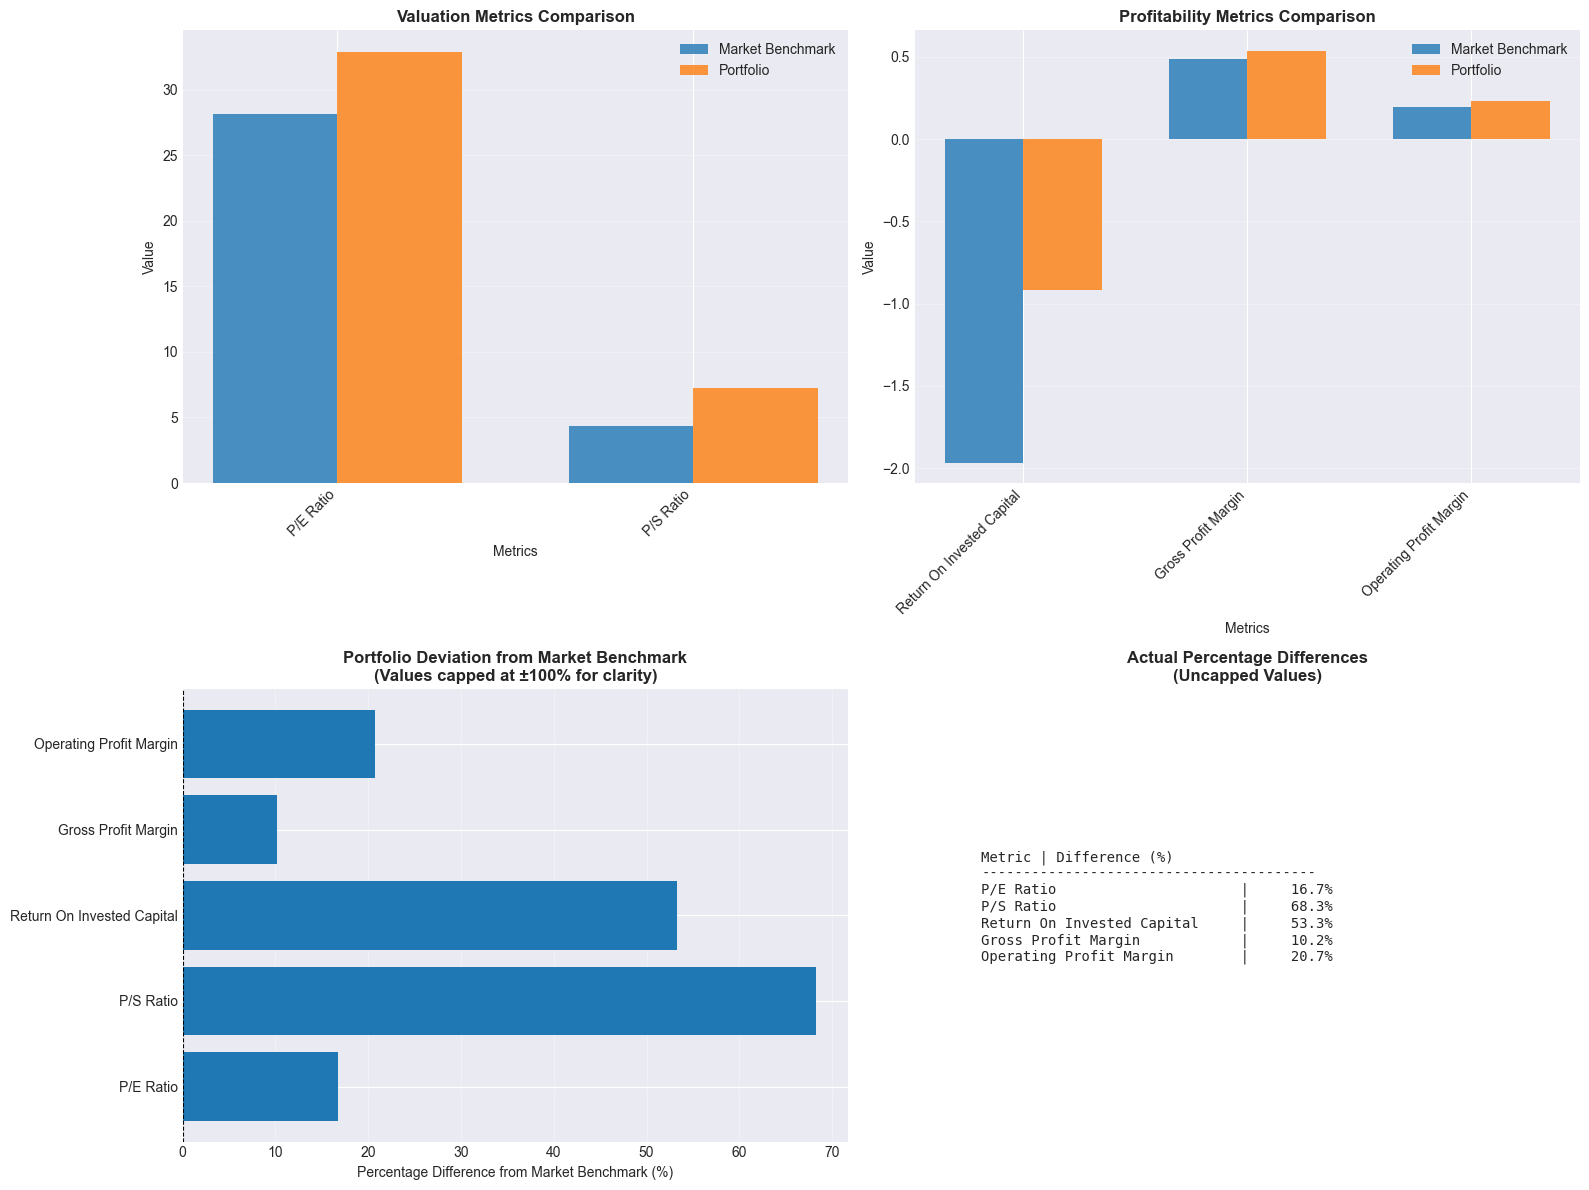

In [170]:
# ============================================================================
# CELL 6: BENCHMARK COMPARISON
# ============================================================================
# Purpose: Compare portfolio characteristics against market benchmarks
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Use the same 2023 data from Cell 5
# If df_recent doesn't exist, recreate it
if 'df_recent' not in globals():
    target_year = 2023
    df_recent = df[df['Calendar Year'] == target_year].copy()
    df_recent = df_recent.dropna(subset=['Sector']).copy()

print("=== BENCHMARK COMPARISON ANALYSIS ===")
print()

# ============================================================================
# PART 1: Calculate Market Benchmark Metrics
# ============================================================================

# The market benchmark is calculated from all companies in the dataset
# This represents the overall market characteristics

metrics_to_compare = ['P/E Ratio', 'P/S Ratio', 'Return On Equity', 
                     'Return On Invested Capital', 'Gross Profit Margin', 
                     'Operating Profit Margin']

# Filter to metrics that exist
available_metrics = [m for m in metrics_to_compare if m in df_recent.columns]

print("Comparing metrics: " + ", ".join(available_metrics))
print()

# Initialize dictionaries to store results
market_benchmark = {}
portfolio_metrics = {}

# Helper function to clean P/E ratio (filter extreme outliers)
def clean_pe_ratio(values, max_pe=100):
    """Filter P/E ratios to reasonable range"""
    cleaned = pd.to_numeric(values, errors='coerce')
    # Remove negative and extreme outliers
    cleaned = cleaned[(cleaned > 0) & (cleaned <= max_pe)]
    return cleaned

# Calculate market benchmark (equal-weighted average across all companies)
print("=== MARKET BENCHMARK (Equal-Weighted) ===")
for metric in available_metrics:
    metric_values = pd.to_numeric(df_recent[metric], errors='coerce')
    
    # Special handling for P/E Ratio - filter outliers
    if metric == 'P/E Ratio':
        metric_values = clean_pe_ratio(metric_values, max_pe=100)
    else:
        metric_values = metric_values.dropna()
    
    if len(metric_values) > 0:
        market_benchmark[metric] = {
            'mean': metric_values.mean(),
            'median': metric_values.median()
        }
        print(f"{metric}:")
        print(f"  Mean: {market_benchmark[metric]['mean']:.2f}")
        print(f"  Median: {market_benchmark[metric]['median']:.2f}")
        print(f"  Count: {len(metric_values)}")
        print()
print()

# ============================================================================
# PART 2: Calculate Market Cap Weighted Portfolio Metrics
# ============================================================================

# For portfolio comparison, we'll use market cap-weighted averages
# This gives more weight to larger companies

if 'Market Cap' in df_recent.columns:
    print("=== PORTFOLIO METRICS (Market Cap-Weighted) ===")
    
    # Remove rows with missing Market Cap
    df_with_mcap = df_recent.dropna(subset=['Market Cap']).copy()
    total_market_cap = df_with_mcap['Market Cap'].sum()
    
    if total_market_cap > 0:
        for metric in available_metrics:
            metric_values = pd.to_numeric(df_with_mcap[metric], errors='coerce')
            
            # Special handling for P/E Ratio - filter outliers
            if metric == 'P/E Ratio':
                valid_mask = (metric_values > 0) & (metric_values <= 100) & df_with_mcap['Market Cap'].notna()
            else:
                valid_mask = metric_values.notna() & df_with_mcap['Market Cap'].notna()
            
            if valid_mask.sum() > 0:
                weighted_sum = (metric_values[valid_mask] * df_with_mcap.loc[valid_mask, 'Market Cap']).sum()
                total_weight = df_with_mcap.loc[valid_mask, 'Market Cap'].sum()
                
                if total_weight > 0:
                    weighted_avg = weighted_sum / total_weight
                    portfolio_metrics[metric] = weighted_avg
                    
                    print(f"{metric}:")
                    print(f"  Market Cap-Weighted Average: {weighted_avg:.2f}")
                    print(f"  Count: {valid_mask.sum()}")
                    print()
        print()
    else:
        print("Cannot calculate market cap-weighted metrics: total market cap is zero")
        print()
else:
    print("Market Cap column not available - using equal-weighted portfolio metrics")
    print()

# ============================================================================
# PART 3: Create Comparison Table
# ============================================================================

# Build comparison table
comparison_data = []

for metric in available_metrics:
    row = {'Metric': metric}
    
    # Market benchmark (equal-weighted)
    if metric in market_benchmark:
        row['Market_Benchmark_Mean'] = market_benchmark[metric]['mean']
        row['Market_Benchmark_Median'] = market_benchmark[metric]['median']
    else:
        row['Market_Benchmark_Mean'] = np.nan
        row['Market_Benchmark_Median'] = np.nan
    
    # Portfolio metrics (market cap-weighted if available, else equal-weighted)
    if metric in portfolio_metrics:
        row['Portfolio_Weighted'] = portfolio_metrics[metric]
    elif metric in market_benchmark:
        # Use equal-weighted as fallback
        row['Portfolio_Weighted'] = market_benchmark[metric]['mean']
    else:
        row['Portfolio_Weighted'] = np.nan
    
    # Calculate difference
    if not np.isnan(row['Market_Benchmark_Mean']) and not np.isnan(row['Portfolio_Weighted']):
        row['Difference'] = row['Portfolio_Weighted'] - row['Market_Benchmark_Mean']
        if row['Market_Benchmark_Mean'] != 0:
            row['Difference_Pct'] = ((row['Portfolio_Weighted'] - row['Market_Benchmark_Mean']) / 
                                     abs(row['Market_Benchmark_Mean']) * 100)
        else:
            row['Difference_Pct'] = np.nan
    else:
        row['Difference'] = np.nan
        row['Difference_Pct'] = np.nan
    
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)

print("=== PORTFOLIO VS MARKET BENCHMARK COMPARISON ===")
print(comparison_df.to_string(index=False))
print()

# ============================================================================
# PART 4: Visualizations (Fixed for different scales)
# ============================================================================

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Side-by-side comparison of valuation metrics (P/E, P/S)
valuation_metrics = ['P/E Ratio', 'P/S Ratio']
valuation_to_plot = [m for m in valuation_metrics if m in available_metrics]

if len(valuation_to_plot) > 0:
    x = np.arange(len(valuation_to_plot))
    width = 0.35
    
    market_values = []
    portfolio_values = []
    
    for metric in valuation_to_plot:
        if metric in market_benchmark:
            market_values.append(market_benchmark[metric]['mean'])
        else:
            market_values.append(0)
        
        if metric in portfolio_metrics:
            portfolio_values.append(portfolio_metrics[metric])
        elif metric in market_benchmark:
            portfolio_values.append(market_benchmark[metric]['mean'])
        else:
            portfolio_values.append(0)
    
    axes[0, 0].bar(x - width/2, market_values, width, label='Market Benchmark', alpha=0.8)
    axes[0, 0].bar(x + width/2, portfolio_values, width, label='Portfolio', alpha=0.8)
    
    axes[0, 0].set_xlabel('Metrics')
    axes[0, 0].set_ylabel('Value')
    axes[0, 0].set_title('Valuation Metrics Comparison', fontsize=12, fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(valuation_to_plot, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Profitability metrics (ROIC, Margins) - ROE excluded due to data quality issues
profitability_metrics = ['Return On Invested Capital', 
                        'Gross Profit Margin', 'Operating Profit Margin']
profitability_to_plot = [m for m in profitability_metrics if m in available_metrics]

if len(profitability_to_plot) > 0:
    x = np.arange(len(profitability_to_plot))
    width = 0.35
    
    market_values = []
    portfolio_values = []
    
    for metric in profitability_to_plot:
        if metric in market_benchmark:
            market_values.append(market_benchmark[metric]['mean'])
        else:
            market_values.append(0)
        
        if metric in portfolio_metrics:
            portfolio_values.append(portfolio_metrics[metric])
        elif metric in market_benchmark:
            portfolio_values.append(market_benchmark[metric]['mean'])
        else:
            portfolio_values.append(0)
    
    axes[0, 1].bar(x - width/2, market_values, width, label='Market Benchmark', alpha=0.8)
    axes[0, 1].bar(x + width/2, portfolio_values, width, label='Portfolio', alpha=0.8)
    
    axes[0, 1].set_xlabel('Metrics')
    axes[0, 1].set_ylabel('Value')
    axes[0, 1].set_title('Profitability Metrics Comparison', fontsize=12, fontweight='bold')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(profitability_to_plot, rotation=45, ha='right')
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Percentage difference from benchmark (all metrics except ROE)
if len(comparison_df) > 0:
    metrics_with_diff = comparison_df[comparison_df['Difference_Pct'].notna()].copy()
    
    # Remove Return On Equity from plots due to data quality issues
    metrics_with_diff = metrics_with_diff[metrics_with_diff['Metric'] != 'Return On Equity']
    
    if len(metrics_with_diff) > 0:
        # Cap extreme percentages for better visualization
        metrics_with_diff_plot = metrics_with_diff.copy()
        metrics_with_diff_plot['Difference_Pct_Capped'] = metrics_with_diff_plot['Difference_Pct'].clip(-100, 100)
        
        axes[1, 0].barh(metrics_with_diff_plot['Metric'], metrics_with_diff_plot['Difference_Pct_Capped'])
        axes[1, 0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
        axes[1, 0].set_xlabel('Percentage Difference from Market Benchmark (%)')
        axes[1, 0].set_title('Portfolio Deviation from Market Benchmark\n(Values capped at ±100% for clarity)', 
                             fontsize=12, fontweight='bold')
        axes[1, 0].grid(axis='x', alpha=0.3)
        
        # Show actual values in text if they exceed the cap
        for idx, row in metrics_with_diff_plot.iterrows():
            if abs(row['Difference_Pct']) > 100:
                actual_pct = row['Difference_Pct']
                axes[1, 0].text(100 if actual_pct > 0 else -100, idx, 
                               f'({actual_pct:.0f}%)', 
                               va='center', fontsize=8, color='red')

# Plot 4: Show actual uncapped percentage differences as text (excluding ROE)
if len(comparison_df) > 0:
    metrics_with_diff = comparison_df[comparison_df['Difference_Pct'].notna()].copy()
    
    # Remove Return On Equity from plots due to data quality issues
    metrics_with_diff = metrics_with_diff[metrics_with_diff['Metric'] != 'Return On Equity']
    
    if len(metrics_with_diff) > 0:
        axes[1, 1].axis('off')
        axes[1, 1].set_title('Actual Percentage Differences\n(Uncapped Values)', fontsize=12, fontweight='bold')
        
        text_content = "Metric | Difference (%)\n"
        text_content += "-" * 40 + "\n"
        
        for _, row in metrics_with_diff.iterrows():
            metric_name = row['Metric'][:30]  # Truncate long names
            diff_pct = row['Difference_Pct']
            text_content += f"{metric_name:30} | {diff_pct:8.1f}%\n"
        
        axes[1, 1].text(0.1, 0.5, text_content, fontfamily='monospace', 
                       verticalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


In [171]:
# ============================================================================
# CELL 7: VALUATION SCREENING
# ============================================================================
# Purpose: Identify companies with attractive valuations using P/E and P/S ratios
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the same 2023 data from previous cells
if 'df_recent' not in globals():
    target_year = 2023
    df_recent = df[df['Calendar Year'] == target_year].copy()
    df_recent = df_recent.dropna(subset=['Sector']).copy()

print("=== VALUATION SCREENING ANALYSIS ===")
print()

# Create a working copy for screening
df_screen = df_recent.copy()

# ============================================================================
# PART 1: P/E Ratio Screening
# ============================================================================

print("=== P/E RATIO SCREENING ===")

if 'P/E Ratio' in df_screen.columns:
    # Convert to numeric and clean
    pe_values = pd.to_numeric(df_screen['P/E Ratio'], errors='coerce')
    
    # Filter to reasonable range (0 to 100)
    pe_valid = pe_values[(pe_values > 0) & (pe_values <= 100)]
    
    if len(pe_valid) > 0:
        # Calculate percentiles
        pe_25 = pe_valid.quantile(0.25)
        pe_50 = pe_valid.quantile(0.50)  # median
        pe_75 = pe_valid.quantile(0.75)
        
        print(f"P/E Ratio Statistics:")
        print(f"  25th Percentile: {pe_25:.2f}")
        print(f"  Median (50th): {pe_50:.2f}")
        print(f"  75th Percentile: {pe_75:.2f}")
        print(f"  Valid observations: {len(pe_valid)}")
        print()
        
        # Create flags for valuation categories
        df_screen['PE_Value_Flag'] = False
        df_screen['PE_Deep_Value_Flag'] = False
        df_screen['PE_Valid'] = False
        
        # Set flags based on P/E ratio
        valid_mask = (pe_values > 0) & (pe_values <= 100)
        df_screen.loc[valid_mask, 'PE_Valid'] = True
        
        # Value stocks: below median P/E
        df_screen.loc[(pe_values <= pe_50) & valid_mask, 'PE_Value_Flag'] = True
        
        # Deep value stocks: bottom quartile
        df_screen.loc[(pe_values <= pe_25) & valid_mask, 'PE_Deep_Value_Flag'] = True
        
        # Count companies in each category
        value_count = df_screen['PE_Value_Flag'].sum()
        deep_value_count = df_screen['PE_Deep_Value_Flag'].sum()
        
        print(f"Value Stocks (P/E ≤ median): {value_count} companies")
        print(f"Deep Value Stocks (P/E ≤ 25th percentile): {deep_value_count} companies")
        print()
    else:
        print("Not enough valid P/E ratios for screening")
        print()
else:
    print("P/E Ratio column not available")
    print()

# ============================================================================
# PART 2: P/S Ratio Screening
# ============================================================================

print("=== P/S RATIO SCREENING ===")

if 'P/S Ratio' in df_screen.columns:
    # Convert to numeric
    ps_values = pd.to_numeric(df_screen['P/S Ratio'], errors='coerce')
    ps_valid = ps_values.dropna()
    
    if len(ps_valid) > 0:
        # Calculate percentiles
        ps_25 = ps_valid.quantile(0.25)
        ps_50 = ps_valid.quantile(0.50)  # median
        ps_75 = ps_valid.quantile(0.75)
        
        print(f"P/S Ratio Statistics:")
        print(f"  25th Percentile: {ps_25:.2f}")
        print(f"  Median (50th): {ps_50:.2f}")
        print(f"  75th Percentile: {ps_75:.2f}")
        print(f"  Valid observations: {len(ps_valid)}")
        print()
        
        # Create flags
        df_screen['PS_Value_Flag'] = False
        df_screen['PS_Deep_Value_Flag'] = False
        
        # Value stocks: below median P/S
        df_screen.loc[ps_values <= ps_50, 'PS_Value_Flag'] = True
        
        # Deep value stocks: bottom quartile
        df_screen.loc[ps_values <= ps_25, 'PS_Deep_Value_Flag'] = True
        
        # Count companies
        ps_value_count = df_screen['PS_Value_Flag'].sum()
        ps_deep_value_count = df_screen['PS_Deep_Value_Flag'].sum()
        
        print(f"Value Stocks (P/S ≤ median): {ps_value_count} companies")
        print(f"Deep Value Stocks (P/S ≤ 25th percentile): {ps_deep_value_count} companies")
        print()
    else:
        print("Not enough valid P/S ratios for screening")
        print()
else:
    print("P/S Ratio column not available")
    print()

# ============================================================================
# PART 3: Combined Valuation Score
# ============================================================================

print("=== COMBINED VALUATION SCORE ===")

# Create normalized percentile ranks for valuation metrics
# Lower values = cheaper valuation

df_screen['PE_Percentile_Rank'] = np.nan
df_screen['PS_Percentile_Rank'] = np.nan
df_screen['Valuation_Score'] = np.nan

if 'P/E Ratio' in df_screen.columns and len(pe_valid) > 0:
    # Calculate percentile rank (0-100, lower = cheaper)
    valid_pe_mask = df_screen['PE_Valid']
    if valid_pe_mask.sum() > 0:
        df_screen.loc[valid_pe_mask, 'PE_Percentile_Rank'] = (
            pe_values[valid_pe_mask].rank(pct=True) * 100
        )

if 'P/S Ratio' in df_screen.columns and len(ps_valid) > 0:
    # Calculate percentile rank
    valid_ps_mask = ps_values.notna()
    if valid_ps_mask.sum() > 0:
        df_screen.loc[valid_ps_mask, 'PS_Percentile_Rank'] = (
            ps_values[valid_ps_mask].rank(pct=True) * 100
        )

# Combined valuation score: average of normalized ranks
# Lower score = cheaper valuation
both_valid = df_screen['PE_Percentile_Rank'].notna() & df_screen['PS_Percentile_Rank'].notna()

if both_valid.sum() > 0:
    df_screen.loc[both_valid, 'Valuation_Score'] = (
        (df_screen.loc[both_valid, 'PE_Percentile_Rank'] + 
         df_screen.loc[both_valid, 'PS_Percentile_Rank']) / 2
    )
    
    # Also handle cases where only one metric is available
    only_pe = df_screen['PE_Percentile_Rank'].notna() & df_screen['PS_Percentile_Rank'].isna()
    df_screen.loc[only_pe, 'Valuation_Score'] = df_screen.loc[only_pe, 'PE_Percentile_Rank']
    
    # Only assign score based on P/S if P/E is valid (positive) or missing, NOT if P/E is negative
    only_ps = df_screen['PS_Percentile_Rank'].notna() & df_screen['PE_Percentile_Rank'].isna()
    # Exclude companies with negative P/E ratios when assigning score based on P/S only
    pe_values_check = pd.to_numeric(df_screen['P/E Ratio'], errors='coerce')
    only_ps_valid = only_ps & ((pe_values_check > 0) | (pe_values_check.isna()))
    df_screen.loc[only_ps_valid, 'Valuation_Score'] = df_screen.loc[only_ps_valid, 'PS_Percentile_Rank']
    
    print(f"Valuation scores calculated for {df_screen['Valuation_Score'].notna().sum()} companies")
    print(f"Average Valuation Score: {df_screen['Valuation_Score'].mean():.2f} (lower = cheaper)")
    print()
else:
    print("Cannot calculate combined valuation score")
    print()

# ============================================================================
# PART 4: Profitability Screening
# ============================================================================

print("=== PROFITABILITY SCREENING ===")

profitability_flags = []

# Check for positive ROIC
if 'Return On Invested Capital' in df_screen.columns:
    roic_values = pd.to_numeric(df_screen['Return On Invested Capital'], errors='coerce')
    positive_roic = (roic_values > 0).sum()
    df_screen['Has_Positive_ROIC'] = roic_values > 0
    profitability_flags.append(f"Positive ROIC: {positive_roic} companies")

# Check for above-median profitability
if 'Return On Invested Capital' in df_screen.columns:
    roic_median = roic_values.median()
    above_median_roic = (roic_values > roic_median).sum()
    df_screen['Above_Median_ROIC'] = roic_values > roic_median
    profitability_flags.append(f"Above Median ROIC: {above_median_roic} companies")

if profitability_flags:
    for flag in profitability_flags:
        print(flag)
    print()
else:
    print("No profitability metrics available for screening")
    print()

# ============================================================================
# PART 5: Summary of Valuation Screening Results
# ============================================================================

print("=== VALUATION SCREENING SUMMARY ===")

# Find companies that are cheap on both metrics
if 'PE_Value_Flag' in df_screen.columns and 'PS_Value_Flag' in df_screen.columns:
    cheap_both = df_screen['PE_Value_Flag'] & df_screen['PS_Value_Flag']
    print(f"Companies with P/E ≤ median AND P/S ≤ median: {cheap_both.sum()}")
    print()

# Show top value opportunities (lowest valuation scores)
if 'Valuation_Score' in df_screen.columns:
    # Filter out companies with negative P/E ratios
    pe_values_filter = pd.to_numeric(df_screen['P/E Ratio'], errors='coerce')
    df_screen_valid = df_screen[(pe_values_filter > 0) | (pe_values_filter.isna())].copy()
    top_value = df_screen_valid.nsmallest(10, 'Valuation_Score')[
        ['Ticker', 'Company Name', 'Sector', 'P/E Ratio', 'P/S Ratio', 'Valuation_Score']
    ]
    
    print("Top 10 Value Opportunities (Lowest Valuation Scores):")
    print(top_value.to_string(index=False))
    print()

=== VALUATION SCREENING ANALYSIS ===

=== P/E RATIO SCREENING ===
P/E Ratio Statistics:
  25th Percentile: 15.18
  Median (50th): 23.92
  75th Percentile: 34.97
  Valid observations: 439

Value Stocks (P/E ≤ median): 220 companies
Deep Value Stocks (P/E ≤ 25th percentile): 110 companies

=== P/S RATIO SCREENING ===
P/S Ratio Statistics:
  25th Percentile: 1.55
  Median (50th): 2.94
  75th Percentile: 5.65
  Valid observations: 489

Value Stocks (P/S ≤ median): 245 companies
Deep Value Stocks (P/S ≤ 25th percentile): 124 companies

=== COMBINED VALUATION SCORE ===
Valuation scores calculated for 458 companies
Average Valuation Score: 51.13 (lower = cheaper)

=== PROFITABILITY SCREENING ===
Positive ROIC: 459 companies
Above Median ROIC: 244 companies

=== VALUATION SCREENING SUMMARY ===
Companies with P/E ≤ median AND P/S ≤ median: 167

Top 10 Value Opportunities (Lowest Valuation Scores):
Ticker                   Company Name             Sector  P/E Ratio  P/S Ratio  Valuation_Score
  

In [172]:
# ============================================================================
# CELL 8: QUALITY SCORING FRAMEWORK
# ============================================================================
# Purpose: Create a composite quality score based on profitability, margins, 
#          financial strength, and liquidity metrics
# Components: ROIC, ROE, Margins, Interest Coverage, Liquidity
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the same 2023 data from previous cells
if 'df_recent' not in globals():
    target_year = 2023
    df_recent = df[df['Calendar Year'] == target_year].copy()
    df_recent = df_recent.dropna(subset=['Sector']).copy()

# Use df_screen if available from Cell 7, otherwise use df_recent
if 'df_screen' not in globals():
    df_screen = df_recent.copy()

print("=== QUALITY SCORING FRAMEWORK ===")
print()

# ============================================================================
# PART 1: ROIC Component
# ============================================================================

print("=== ROIC COMPONENT ===")

# Return On Invested Capital - measures capital efficiency
roic_score = pd.Series(0.0, index=df_screen.index)

if 'Return On Invested Capital' in df_screen.columns:
    roic_values = pd.to_numeric(df_screen['Return On Invested Capital'], errors='coerce')
    roic_valid = roic_values.dropna()
    
    if len(roic_valid) > 0:
        # Calculate percentiles for scoring
        roic_median = roic_valid.median()
        roic_75 = roic_valid.quantile(0.75)
        
        # Assign scores: Above 75th percentile = 3, Above median = 2, Positive = 1, else = 0
        roic_score.loc[roic_values >= roic_75] = 3
        roic_score.loc[(roic_values >= roic_median) & (roic_values < roic_75)] = 2
        roic_score.loc[(roic_values > 0) & (roic_values < roic_median)] = 1
        roic_score.loc[roic_values <= 0] = 0
        
        print(f"ROIC Scoring:")
        print(f"  Score 3 (Top quartile): {(roic_score == 3).sum()} companies")
        print(f"  Score 2 (Above median): {(roic_score == 2).sum()} companies")
        print(f"  Score 1 (Positive): {(roic_score == 1).sum()} companies")
        print(f"  Score 0 (Negative/Zero): {(roic_score == 0).sum()} companies")
        print()
    else:
        print("Not enough valid ROIC data")
        print()
else:
    print("Return On Invested Capital column not available")
    print()

# ============================================================================
# PART 2: ROE Component
# ============================================================================

print("=== ROE COMPONENT ===")

# Return On Equity - measures profitability relative to shareholder equity
roe_score = pd.Series(0.0, index=df_screen.index)

if 'Return On Equity' in df_screen.columns:
    roe_values = pd.to_numeric(df_screen['Return On Equity'], errors='coerce')
    roe_valid = roe_values.dropna()
    
    if len(roe_valid) > 0:
        # Calculate percentiles for scoring
        roe_median = roe_valid.median()
        roe_75 = roe_valid.quantile(0.75)
        
        # Assign scores: Above 75th percentile = 3, Above median = 2, Positive = 1, else = 0
        roe_score.loc[roe_values >= roe_75] = 3
        roe_score.loc[(roe_values >= roe_median) & (roe_values < roe_75)] = 2
        roe_score.loc[(roe_values > 0) & (roe_values < roe_median)] = 1
        roe_score.loc[roe_values <= 0] = 0
        
        print(f"ROE Scoring:")
        print(f"  Score 3 (Top quartile): {(roe_score == 3).sum()} companies")
        print(f"  Score 2 (Above median): {(roe_score == 2).sum()} companies")
        print(f"  Score 1 (Positive): {(roe_score == 1).sum()} companies")
        print(f"  Score 0 (Negative/Zero): {(roe_score == 0).sum()} companies")
        print()
    else:
        print("Not enough valid ROE data")
        print()
else:
    print("Return On Equity column not available")
    print()

# ============================================================================
# PART 3: Margins Component
# ============================================================================

print("=== MARGINS COMPONENT ===")

# Gross Profit Margin and Operating Profit Margin
margins_score = pd.Series(0.0, index=df_screen.index)

if 'Gross Profit Margin' in df_screen.columns and 'Operating Profit Margin' in df_screen.columns:
    gross_margin = pd.to_numeric(df_screen['Gross Profit Margin'], errors='coerce')
    op_margin = pd.to_numeric(df_screen['Operating Profit Margin'], errors='coerce')
    
    # Average of both margins
    avg_margin = (gross_margin + op_margin) / 2
    avg_margin_valid = avg_margin.dropna()
    
    if len(avg_margin_valid) > 0:
        margin_median = avg_margin_valid.median()
        margin_75 = avg_margin_valid.quantile(0.75)
        
        # Assign scores based on average margin
        margins_score.loc[avg_margin >= margin_75] = 3
        margins_score.loc[(avg_margin >= margin_median) & (avg_margin < margin_75)] = 2
        margins_score.loc[(avg_margin > 0) & (avg_margin < margin_median)] = 1
        margins_score.loc[avg_margin <= 0] = 0
        
        print(f"Margins Scoring (Average of Gross & Operating):")
        print(f"  Score 3 (Top quartile): {(margins_score == 3).sum()} companies")
        print(f"  Score 2 (Above median): {(margins_score == 2).sum()} companies")
        print(f"  Score 1 (Positive): {(margins_score == 1).sum()} companies")
        print(f"  Score 0 (Negative/Zero): {(margins_score == 0).sum()} companies")
        print()
    else:
        print("Not enough valid margin data")
        print()
else:
    print("Margin columns not available")
    print()

# ============================================================================
# PART 4: Interest Coverage Component
# ============================================================================

print("=== INTEREST COVERAGE COMPONENT ===")

# Interest Coverage Ratio - measures ability to service debt
coverage_score = pd.Series(0.0, index=df_screen.index)

if 'Interest Coverage Ratio' in df_screen.columns:
    coverage_values = pd.to_numeric(df_screen['Interest Coverage Ratio'], errors='coerce')
    coverage_valid = coverage_values[coverage_values > 0].dropna()
    
    if len(coverage_valid) > 0:
        # Standard thresholds: >5 = excellent, 2-5 = good, 1-2 = okay, <1 = poor
        coverage_score.loc[coverage_values >= 5] = 3
        coverage_score.loc[(coverage_values >= 2) & (coverage_values < 5)] = 2
        coverage_score.loc[(coverage_values >= 1) & (coverage_values < 2)] = 1
        coverage_score.loc[(coverage_values < 1) | (coverage_values.isna())] = 0
        
        print(f"Interest Coverage Scoring:")
        print(f"  Score 3 (≥5x): {(coverage_score == 3).sum()} companies")
        print(f"  Score 2 (2-5x): {(coverage_score == 2).sum()} companies")
        print(f"  Score 1 (1-2x): {(coverage_score == 1).sum()} companies")
        print(f"  Score 0 (<1x or missing): {(coverage_score == 0).sum()} companies")
        print()
    else:
        print("Not enough valid interest coverage data")
        print()
else:
    print("Interest Coverage Ratio column not available")
    print()

# ============================================================================
# PART 5: Liquidity Component
# ============================================================================

print("=== LIQUIDITY COMPONENT ===")

# Current Ratio - measures short-term liquidity
liquidity_score = pd.Series(0.0, index=df_screen.index)

if 'Current Ratio' in df_screen.columns:
    current_ratio = pd.to_numeric(df_screen['Current Ratio'], errors='coerce')
    current_ratio_valid = current_ratio[current_ratio > 0].dropna()
    
    if len(current_ratio_valid) > 0:
        # Standard thresholds: >2 = excellent, 1.5-2 = good, 1-1.5 = okay, <1 = poor
        liquidity_score.loc[current_ratio >= 2] = 3
        liquidity_score.loc[(current_ratio >= 1.5) & (current_ratio < 2)] = 2
        liquidity_score.loc[(current_ratio >= 1) & (current_ratio < 1.5)] = 1
        liquidity_score.loc[(current_ratio < 1) | (current_ratio.isna())] = 0
        
        print(f"Liquidity Scoring (Current Ratio):")
        print(f"  Score 3 (≥2.0): {(liquidity_score == 3).sum()} companies")
        print(f"  Score 2 (1.5-2.0): {(liquidity_score == 2).sum()} companies")
        print(f"  Score 1 (1.0-1.5): {(liquidity_score == 1).sum()} companies")
        print(f"  Score 0 (<1.0 or missing): {(liquidity_score == 0).sum()} companies")
        print()
    else:
        print("Not enough valid liquidity data")
        print()
else:
    print("Current Ratio column not available")
    print()

# ============================================================================
# PART 6: Composite Quality Score
# ============================================================================

print("=== COMPOSITE QUALITY SCORE ===")

# Calculate composite score (average of all components)
# Each component is scored 0-3, so composite ranges from 0-3

quality_components = []
component_names = []

if roic_score.sum() > 0:
    quality_components.append(roic_score)
    component_names.append('ROIC')

if roe_score.sum() > 0:
    quality_components.append(roe_score)
    component_names.append('ROE')

if margins_score.sum() > 0:
    quality_components.append(margins_score)
    component_names.append('Margins')

if coverage_score.sum() > 0:
    quality_components.append(coverage_score)
    component_names.append('Interest_Coverage')

if liquidity_score.sum() > 0:
    quality_components.append(liquidity_score)
    component_names.append('Liquidity')

if len(quality_components) > 0:
    # Create DataFrame of components
    quality_df = pd.DataFrame({
        name: component for name, component in zip(component_names, quality_components)
    })
    
    # Calculate composite score as average
    df_screen['Quality_Score'] = quality_df.mean(axis=1)
    
    # Round to 2 decimal places
    df_screen['Quality_Score'] = df_screen['Quality_Score'].round(2)
    
    print(f"Quality Score Components: {', '.join(component_names)}")
    print(f"Quality scores calculated for {df_screen['Quality_Score'].notna().sum()} companies")
    print(f"Average Quality Score: {df_screen['Quality_Score'].mean():.2f} (max = 3.0)")
    print()
    
    # Quality categories
    df_screen['Quality_Category'] = 'Unknown'
    df_screen.loc[df_screen['Quality_Score'] >= 2.5, 'Quality_Category'] = 'High'
    df_screen.loc[(df_screen['Quality_Score'] >= 1.5) & (df_screen['Quality_Score'] < 2.5), 'Quality_Category'] = 'Medium'
    df_screen.loc[df_screen['Quality_Score'] < 1.5, 'Quality_Category'] = 'Low'
    
    quality_counts = df_screen['Quality_Category'].value_counts()
    print("Quality Distribution:")
    for category, count in quality_counts.items():
        if category != 'Unknown':
            print(f"  {category} Quality: {count} companies")
    print()
else:
    print("Cannot calculate quality score - no valid components available")
    print()

# ============================================================================
# PART 7: Top Quality Companies
# ============================================================================

print("=== TOP QUALITY COMPANIES ===")

if 'Quality_Score' in df_screen.columns:
    top_quality = df_screen.nlargest(10, 'Quality_Score')[
        ['Ticker', 'Company Name', 'Sector', 'Quality_Score', 'Quality_Category',
         'Return On Invested Capital', 'Return On Equity', 'Gross Profit Margin', 
         'Operating Profit Margin', 'Current Ratio']
    ]
    
    print("Top 10 Quality Companies:")
    print(top_quality.to_string(index=False))
    print()

=== QUALITY SCORING FRAMEWORK ===

=== ROIC COMPONENT ===
ROIC Scoring:
  Score 3 (Top quartile): 124 companies
  Score 2 (Above median): 124 companies
  Score 1 (Positive): 211 companies
  Score 0 (Negative/Zero): 30 companies

=== ROE COMPONENT ===
ROE Scoring:
  Score 3 (Top quartile): 123 companies
  Score 2 (Above median): 123 companies
  Score 1 (Positive): 183 companies
  Score 0 (Negative/Zero): 60 companies

=== MARGINS COMPONENT ===
Margins Scoring (Average of Gross & Operating):
  Score 3 (Top quartile): 122 companies
  Score 2 (Above median): 122 companies
  Score 1 (Positive): 242 companies
  Score 0 (Negative/Zero): 3 companies

=== INTEREST COVERAGE COMPONENT ===
Interest Coverage Scoring:
  Score 3 (≥5x): 280 companies
  Score 2 (2-5x): 108 companies
  Score 1 (1-2x): 30 companies
  Score 0 (<1x or missing): 71 companies

=== LIQUIDITY COMPONENT ===
Liquidity Scoring (Current Ratio):
  Score 3 (≥2.0): 118 companies
  Score 2 (1.5-2.0): 70 companies
  Score 1 (1.0-1.5): 

2. Return Prediction Model

In [173]:
# Create target variable: Forward Return
# Ensure data is sorted by Ticker and Calendar Year
df = df_indexed.sort_values(['Ticker', 'Calendar Year'])

# Calculate forward returns: (Price_next_year / Price_current) - 1
# We shift price forward by 1 year within each ticker group
df['Price_Next_Year'] = df.groupby(level='Ticker')['Price'].shift(-1)
df['Forward_Return'] = (df['Price_Next_Year'] / df['Price']) - 1

has_forward_return = df['Forward_Return'].notna()

df_train = df[has_forward_return].copy()
df_predict = df[~has_forward_return].copy()


In [174]:
# Feature selection
final_features = [
    # Valuation ratios
    'P/E Ratio',
    'P/S Ratio',
    
    # Profitability ratios
    'Return On Equity',
    'Return On Assets',
    'Return On Invested Capital',
    'Gross Profit Margin',
    'Operating Profit Margin',
    
    # Financial strength
    'Interest Coverage Ratio',
    'Current Ratio',
    
    # Market factor
    'Beta',
    
    # Cost of capital
    'WACC'
]



In [175]:
# Handle missing values and prepare data features
df_train_clean = df_train[final_features + ['Forward_Return']].copy()

print(f"{'='*60}")
print("PREPARING FEATURES")
print(f"{'='*60}")
print(f"Original training samples: {len(df_train_clean)}")
print(f"Features: {len(final_features)}")
print()

# Check missing values before cleaning
print("Missing values BEFORE cleaning:")
for feat in final_features:
    missing = df_train_clean[feat].isna().sum()
    if missing > 0:
        print(f"  {feat}: {missing} missing ({missing/len(df_train_clean)*100:.1f}%)")

# Fill missing values with median for numeric features
for feat in final_features:
    if df_train_clean[feat].isna().any():
        median_val = df_train_clean[feat].median()
        df_train_clean[feat] = df_train_clean[feat].fillna(median_val)
        print(f"Filled {feat} missing values with median: {median_val:.4f}")

# Winsorize at 1st and 99th percentile to prevent extreme values from dominating
print(f"\n{'='*60}")
print("HANDLING OUTLIERS (Winsorizing at 1% and 99%)")
print(f"{'='*60}")

for feat in final_features:
    q1 = df_train_clean[feat].quantile(0.01)
    q99 = df_train_clean[feat].quantile(0.99)
    clipped_count = ((df_train_clean[feat] < q1) | (df_train_clean[feat] > q99)).sum()
    
    if clipped_count > 0:
        df_train_clean[feat] = df_train_clean[feat].clip(lower=q1, upper=q99)
        print(f"  {feat}: clipped {clipped_count} extreme values")

# Check for any remaining missing values
missing_summary = df_train_clean[final_features].isna().sum()
if missing_summary.sum() == 0:
    print("✓ No missing values remaining")
else:
    print("⚠ Still have missing values:")
    print(missing_summary[missing_summary > 0])

PREPARING FEATURES
Original training samples: 4376
Features: 11

Missing values BEFORE cleaning:
  P/E Ratio: 1 missing (0.0%)
  P/S Ratio: 3 missing (0.1%)
  Return On Equity: 4 missing (0.1%)
  Return On Assets: 2 missing (0.0%)
  Return On Invested Capital: 5 missing (0.1%)
  Gross Profit Margin: 3 missing (0.1%)
  Operating Profit Margin: 2 missing (0.0%)
  Interest Coverage Ratio: 4 missing (0.1%)
  WACC: 1 missing (0.0%)
Filled P/E Ratio missing values with median: 22.4700
Filled P/S Ratio missing values with median: 2.7900
Filled Return On Equity missing values with median: 0.1410
Filled Return On Assets missing values with median: 0.0540
Filled Return On Invested Capital missing values with median: 0.0950
Filled Gross Profit Margin missing values with median: 0.4470
Filled Operating Profit Margin missing values with median: 0.1610
Filled Interest Coverage Ratio missing values with median: 6.7300
Filled WACC missing values with median: 0.0710

HANDLING OUTLIERS (Winsorizing at 1

In [176]:
# Prepare leakage-free training/test sets based on a time-based split
all_years = sorted(df_train.index.get_level_values('Calendar Year').unique())
print(all_years)
split_year = 2020  # keep anything before 2020 in the training fold
train_years = [y for y in all_years if y < split_year]
test_years = [y for y in all_years if y >= split_year]

train_mask = df_train.index.get_level_values('Calendar Year').isin(train_years)
test_mask = df_train.index.get_level_values('Calendar Year').isin(test_years)

df_train_raw = df_train.loc[train_mask, final_features + ['Forward_Return']].copy()
df_test_raw = df_train.loc[test_mask, final_features + ['Forward_Return']].copy()

print(f"{'='*60}")
print("TIME-BASED SPLIT (LEAKAGE SAFE)")
print(f"{'='*60}")
print(f"Training years: {train_years}")
print(f"Test years:     {test_years}")
print(f"Training samples: {len(df_train_raw)}")
print(f"Test samples:     {len(df_test_raw)}")
print()

# Derive imputation/winsorisation parameters from TRAINING data only
train_features = df_train_raw[final_features]
medians = train_features.median()
q1 = train_features.quantile(0.01)
q99 = train_features.quantile(0.99)

print("Training feature medians (used for imputation):")
print(medians.to_dict())
print()


def preprocess_dataset(df_raw: pd.DataFrame) -> pd.DataFrame:
    """Apply training-derived imputations and winsorisation."""
    df_clean = df_raw.copy()
    features = df_clean[final_features].replace([np.inf, -np.inf], np.nan)
    features = features.fillna(medians)
    features = features.clip(lower=q1, upper=q99, axis=1)
    df_clean[final_features] = features
    return df_clean


df_train_clean = preprocess_dataset(df_train_raw)
df_test_clean = preprocess_dataset(df_test_raw)

# Ensure no missing values remain
assert not df_train_clean[final_features].isna().any().any(), "Training features still contain NaNs after preprocessing"
assert not df_test_clean[final_features].isna().any().any(), "Test features still contain NaNs after preprocessing"

X_train = df_train_clean[final_features]
y_train = df_train_clean['Forward_Return']
X_test = df_test_clean[final_features]
y_test = df_test_clean['Forward_Return']



[np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
TIME-BASED SPLIT (LEAKAGE SAFE)
Training years: [np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
Test years:     [np.int64(2020), np.int64(2021), np.int64(2022)]
Training samples: 2905
Test samples:     1471

Training feature medians (used for imputation):
{'P/E Ratio': 22.22, 'P/S Ratio': 2.665, 'Return On Equity': 0.137, 'Return On Assets': 0.054, 'Return On Invested Capital': 0.095, 'Gross Profit Margin': 0.4445, 'Operating Profit Margin': 0.156, 'Interest Coverage Ratio': 6.37, 'Current Ratio': 1.43, 'Beta': 1.05, 'WACC': 0.071}



In [177]:
# Train random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 5a: Initialize the model
print(f"{'='*60}")
print("TRAINING MODEL 1: RANDOM FOREST")
print(f"{'='*60}")

rf_model = RandomForestRegressor(
    n_estimators=100,        # Number of trees
    max_depth=10,            # Limit depth to prevent overfitting
    min_samples_split=20,    # Require at least 20 samples to split
    min_samples_leaf=10,     # Require at least 10 samples per leaf
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all CPU cores
)

# Step 5b: Train the model
print(f"Training on {len(X_train)} samples with {len(final_features)} features...")
rf_model.fit(X_train, y_train)
print("✓ Training complete!")
print()

# Step 5c: Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Step 5d: Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Step 5e: Display results
print(f"{'='*60}")
print("MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"{'Metric':<20} {'Training':<15} {'Test':<15}")
print(f"{'-'*50}")
print(f"{'RMSE':<20} {train_rmse:<15.4f} {test_rmse:<15.4f}")
print(f"{'MAE':<20} {train_mae:<15.4f} {test_mae:<15.4f}")
print(f"{'R² Score':<20} {train_r2:<15.4f} {test_r2:<15.4f}")
print()

# Step 5f: Feature importance
print(f"{'='*60}")
print("TOP 10 MOST IMPORTANT FEATURES")
print(f"{'='*60}")

feature_importance = pd.DataFrame({
    'Feature': final_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))
print()

# Step 5g: Interpretation
print(f"{'='*60}")
print("QUICK INTERPRETATION")
print(f"{'='*60}")
print(f"RMSE: Lower is better. Average prediction error in return units.")
print(f"MAE:  Lower is better. Average absolute prediction error.")
print(f"R²:   Higher is better. Proportion of variance explained.")
print()

if test_r2 > 0:
    print(f"✓ Model explains {test_r2*100:.1f}% of variance in test set")
else:
    print(f"⚠ Model performs worse than simply predicting the mean")

TRAINING MODEL 1: RANDOM FOREST
Training on 2905 samples with 11 features...
✓ Training complete!

MODEL PERFORMANCE
Metric               Training        Test           
--------------------------------------------------
RMSE                 0.3387          0.4004         
MAE                  0.2158          0.2765         
R² Score             0.3014          -0.2837        

TOP 10 MOST IMPORTANT FEATURES
                   Feature  Importance
                 P/E Ratio    0.157601
                      Beta    0.147397
                      WACC    0.122191
                 P/S Ratio    0.097375
Return On Invested Capital    0.082373
             Current Ratio    0.080645
          Return On Assets    0.074896
   Operating Profit Margin    0.072154
       Gross Profit Margin    0.058060
   Interest Coverage Ratio    0.053996

QUICK INTERPRETATION
RMSE: Lower is better. Average prediction error in return units.
MAE:  Lower is better. Average absolute prediction error.
R²:   Higher i

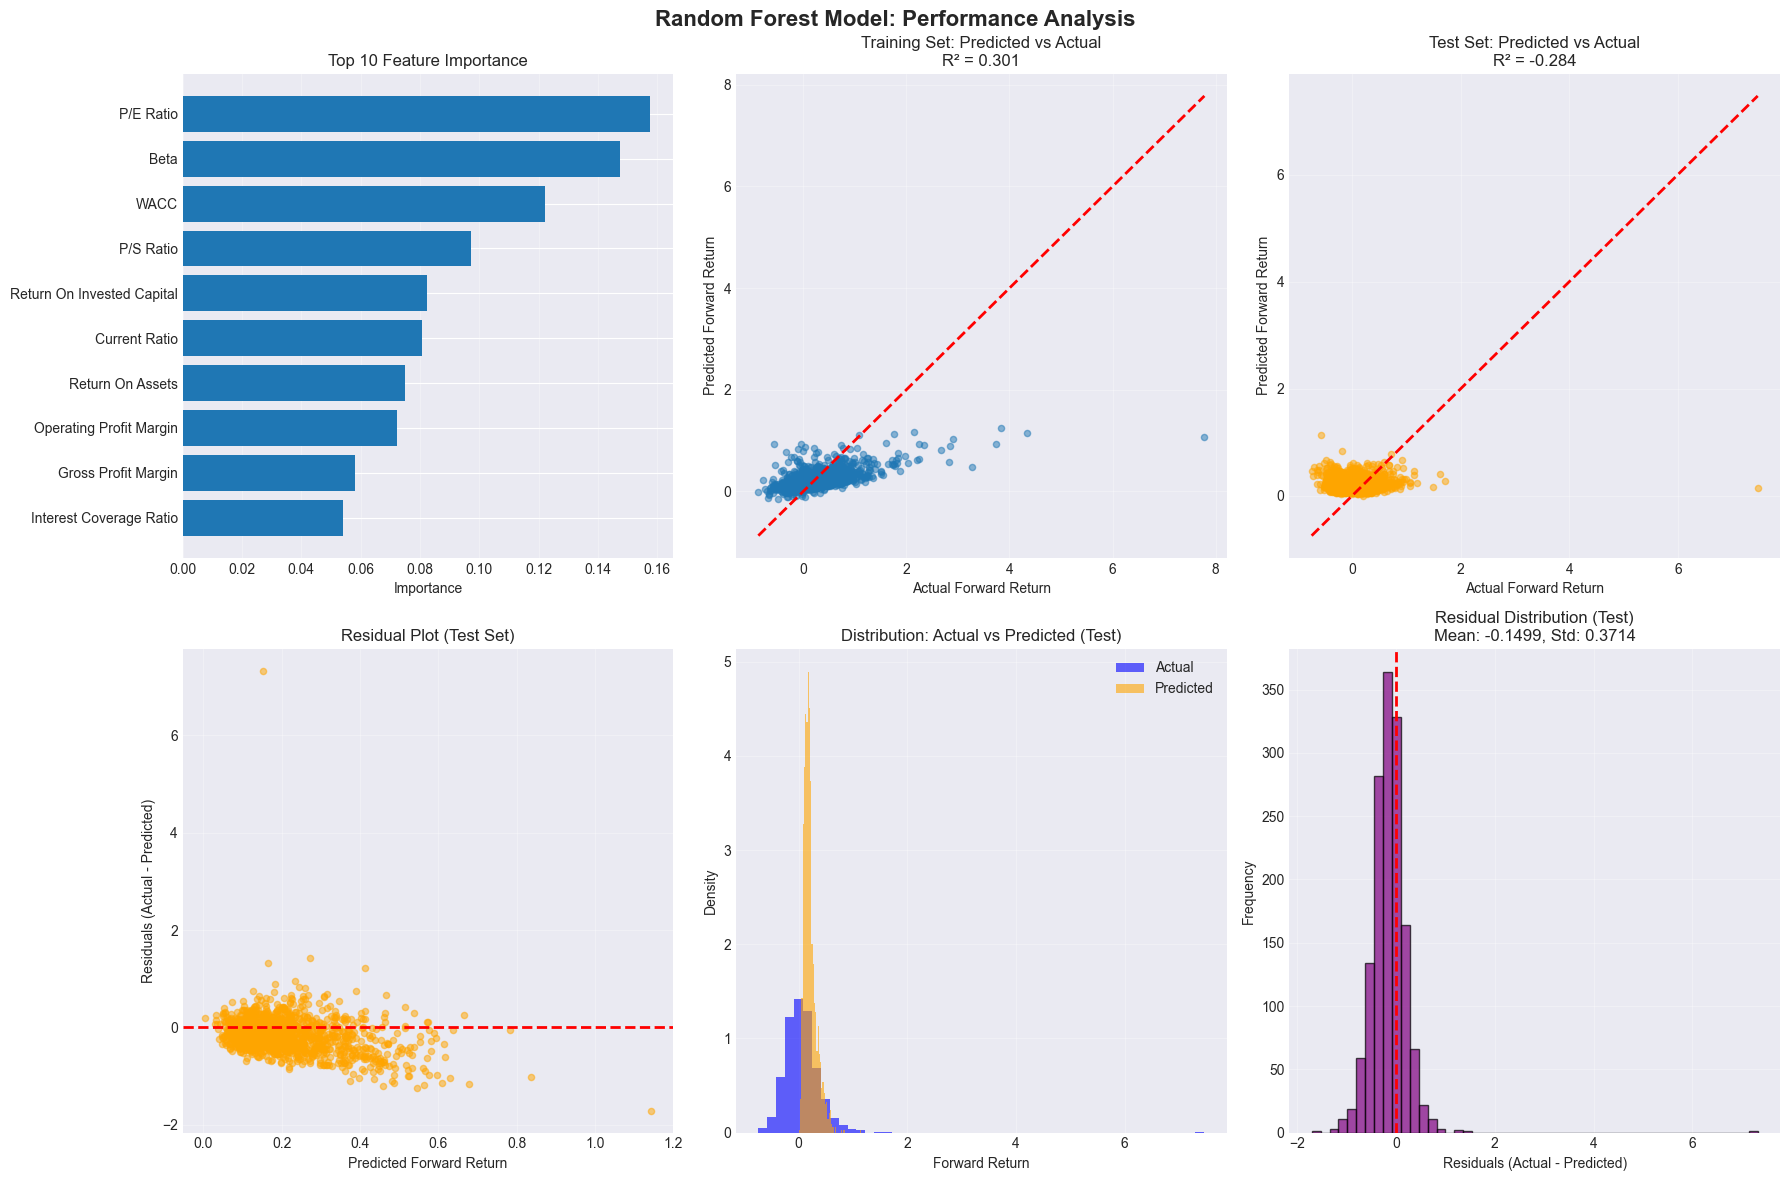

In [178]:
# Visualizations for Random Forest Model
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Random Forest Model: Performance Analysis', fontsize=16, fontweight='bold')

# 1. Feature Importance Bar Chart
ax1 = axes[0, 0]
top_features = feature_importance.head(10)
ax1.barh(range(len(top_features)), top_features['Importance'].values)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['Feature'].values)
ax1.set_xlabel('Importance')
ax1.set_title('Top 10 Feature Importance')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# 2. Predicted vs Actual (Training)
ax2 = axes[0, 1]
ax2.scatter(y_train, y_train_pred, alpha=0.5, s=20)
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Forward Return')
ax2.set_ylabel('Predicted Forward Return')
ax2.set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2:.3f}')
ax2.grid(alpha=0.3)

# 3. Predicted vs Actual (Test)
ax3 = axes[0, 2]
ax3.scatter(y_test, y_test_pred, alpha=0.5, s=20, color='orange')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Forward Return')
ax3.set_ylabel('Predicted Forward Return')
ax3.set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2:.3f}')
ax3.grid(alpha=0.3)

# 4. Residual Plot (Test)
ax4 = axes[1, 0]
residuals_test = y_test - y_test_pred
ax4.scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='orange')
ax4.axhline(y=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Forward Return')
ax4.set_ylabel('Residuals (Actual - Predicted)')
ax4.set_title('Residual Plot (Test Set)')
ax4.grid(alpha=0.3)

# 5. Distribution Comparison
ax5 = axes[1, 1]
ax5.hist(y_test, bins=50, alpha=0.6, label='Actual', density=True, color='blue')
ax5.hist(y_test_pred, bins=50, alpha=0.6, label='Predicted', density=True, color='orange')
ax5.set_xlabel('Forward Return')
ax5.set_ylabel('Density')
ax5.set_title('Distribution: Actual vs Predicted (Test)')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Residual Distribution
ax6 = axes[1, 2]
ax6.hist(residuals_test, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax6.axvline(x=0, color='r', linestyle='--', lw=2)
ax6.set_xlabel('Residuals (Actual - Predicted)')
ax6.set_ylabel('Frequency')
ax6.set_title(f'Residual Distribution (Test)\nMean: {residuals_test.mean():.4f}, Std: {residuals_test.std():.4f}')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Train XGBoost model (same format as Random Forest block)
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print(f"{'='*60}")
print("TRAINING MODEL 2: XGBOOST")
print(f"{'='*60}")

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print(f"Training on {len(X_train)} samples with {len(final_features)} features...")
xgb_model.fit(X_train, y_train)
print("✓ Training complete!")
print()

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Metrics
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"{'='*60}")
print("MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"{'Metric':<20} {'Training':<15} {'Test':<15}")
print(f"{'-'*50}")
print(f"{'RMSE':<20} {train_rmse_xgb:<15.4f} {test_rmse_xgb:<15.4f}")
print(f"{'MAE':<20} {train_mae_xgb:<15.4f} {test_mae_xgb:<15.4f}")
print(f"{'R² Score':<20} {train_r2_xgb:<15.4f} {test_r2_xgb:<15.4f}")
print()

# Feature importance
print(f"{'='*60}")
print("TOP 10 MOST IMPORTANT FEATURES")
print(f"{'='*60}")
feature_importance_xgb = pd.DataFrame({
    'Feature': final_features,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_xgb.head(10).to_string(index=False))
print()

TRAINING MODEL 2: XGBOOST
Training on 2905 samples with 11 features...
✓ Training complete!

MODEL PERFORMANCE
Metric               Training        Test           
--------------------------------------------------
RMSE                 0.2839          0.4146         
MAE                  0.1989          0.2838         
R² Score             0.5090          -0.3763        

TOP 10 MOST IMPORTANT FEATURES
                   Feature  Importance
                      Beta    0.122196
                 P/E Ratio    0.115125
Return On Invested Capital    0.112183
             Current Ratio    0.109247
                      WACC    0.091709
       Gross Profit Margin    0.087176
   Interest Coverage Ratio    0.085202
   Operating Profit Margin    0.077350
                 P/S Ratio    0.073903
          Return On Assets    0.068664



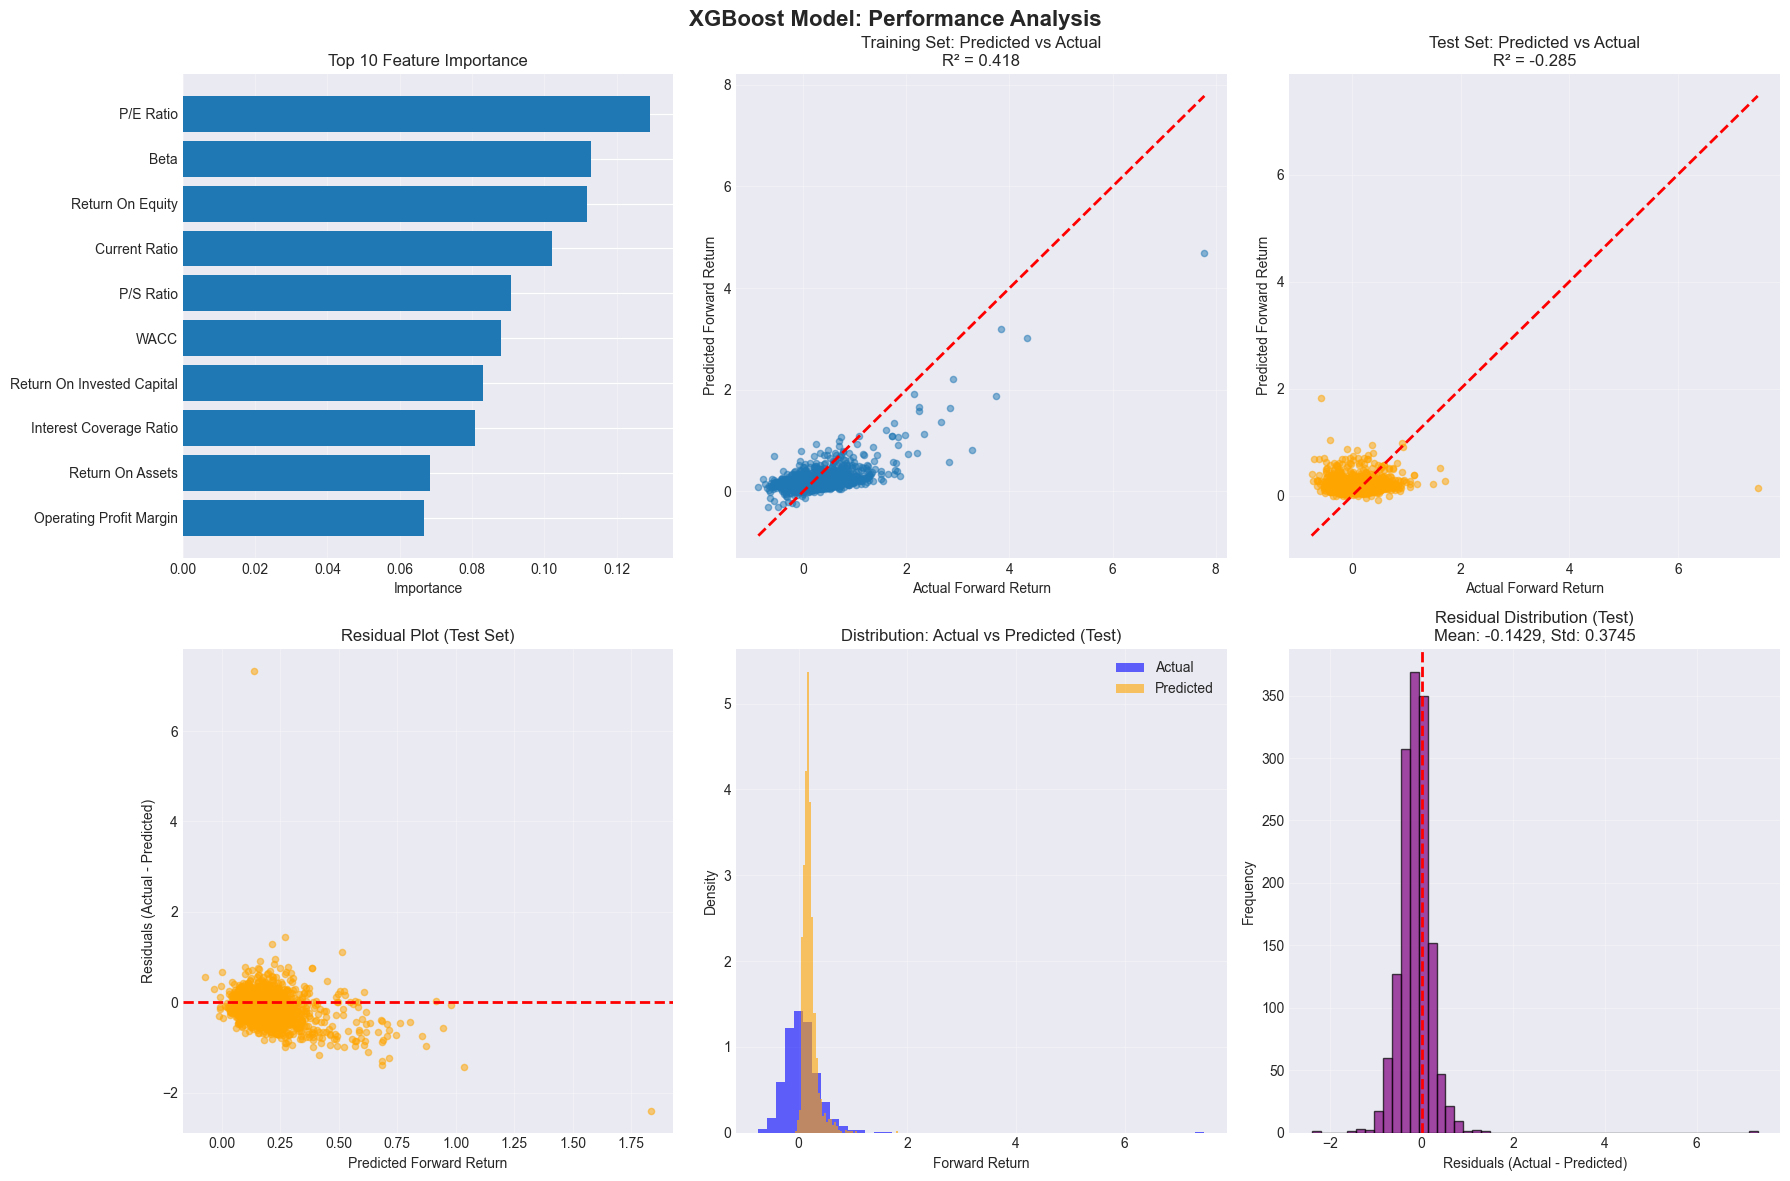

PREDICTION STATISTICS
Test Set:
  Actual Returns - Mean: 0.0593, Std: 0.3535, Range: [-0.7434, 7.4706]
  Predicted Returns - Mean: 0.2022, Std: 0.1300, Range: [-0.0707, 1.8343]
  Residuals - Mean: -0.1429, Std: 0.3745



In [191]:
# Visualizations for XGBoost Model
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('XGBoost Model: Performance Analysis', fontsize=16, fontweight='bold')

# 1. Feature Importance Bar Chart
ax1 = axes[0, 0]
top_features = feature_importance_xgb.head(10)
ax1.barh(range(len(top_features)), top_features['Importance'].values)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['Feature'].values)
ax1.set_xlabel('Importance')
ax1.set_title('Top 10 Feature Importance')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# 2. Predicted vs Actual (Training)
ax2 = axes[0, 1]
ax2.scatter(y_train, y_train_pred_xgb, alpha=0.5, s=20)
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Forward Return')
ax2.set_ylabel('Predicted Forward Return')
ax2.set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2_xgb:.3f}')
ax2.grid(alpha=0.3)

# 3. Predicted vs Actual (Test)
ax3 = axes[0, 2]
ax3.scatter(y_test, y_test_pred_xgb, alpha=0.5, s=20, color='orange')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Forward Return')
ax3.set_ylabel('Predicted Forward Return')
ax3.set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2_xgb:.3f}')
ax3.grid(alpha=0.3)

# 4. Residual Plot (Test)
ax4 = axes[1, 0]
residuals_test_xgb = y_test - y_test_pred_xgb
ax4.scatter(y_test_pred_xgb, residuals_test_xgb, alpha=0.5, s=20, color='orange')
ax4.axhline(y=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Forward Return')
ax4.set_ylabel('Residuals (Actual - Predicted)')
ax4.set_title('Residual Plot (Test Set)')
ax4.grid(alpha=0.3)

# 5. Distribution Comparison
ax5 = axes[1, 1]
ax5.hist(y_test, bins=50, alpha=0.6, label='Actual', density=True, color='blue')
ax5.hist(y_test_pred_xgb, bins=50, alpha=0.6, label='Predicted', density=True, color='orange')
ax5.set_xlabel('Forward Return')
ax5.set_ylabel('Density')
ax5.set_title('Distribution: Actual vs Predicted (Test)')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Residual Distribution
ax6 = axes[1, 2]
ax6.hist(residuals_test_xgb, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax6.axvline(x=0, color='r', linestyle='--', lw=2)
ax6.set_xlabel('Residuals (Actual - Predicted)')
ax6.set_ylabel('Frequency')
ax6.set_title(f'Residual Distribution (Test)\nMean: {residuals_test_xgb.mean():.4f}, Std: {residuals_test_xgb.std():.4f}')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"{'='*60}")
print("PREDICTION STATISTICS")
print(f"{'='*60}")
print(f"Test Set:")
print(f"  Actual Returns - Mean: {y_test.mean():.4f}, Std: {y_test.std():.4f}, Range: [{y_test.min():.4f}, {y_test.max():.4f}]")
print(f"  Predicted Returns - Mean: {y_test_pred_xgb.mean():.4f}, Std: {y_test_pred_xgb.std():.4f}, Range: [{y_test_pred_xgb.min():.4f}, {y_test_pred_xgb.max():.4f}]")
print(f"  Residuals - Mean: {residuals_test_xgb.mean():.4f}, Std: {residuals_test_xgb.std():.4f}")
print()

In [181]:
# XGBoost with ALL features + lagged versions (up to 4 periods)
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"{'='*60}")
print("TRAINING MODEL 2b: XGBOOST WITH LAG FEATURES (ALL FEATURES, 4 PERIODS)")
print(f"{'='*60}")

# Start from the original MultiIndex DataFrame `df` (Ticker, Calendar Year)
df_with_lags = df.copy()

# Use ALL features from final_features instead of just a subset
# final_features should be defined earlier in your notebook
# If not available, use all numeric features that make sense for lagging
all_features = final_features.copy()  # Use the same features as Random Forest/XGBoost

# Add lags for periods 1, 2, 3, and 4 for each feature
lag_features = []
for feat in all_features:
    for lag_period in range(1, 5):  # lag1, lag2, lag3, lag4
        lag_name = f"{feat}_lag{lag_period}"
        df_with_lags[lag_name] = df_with_lags.groupby(level='Ticker')[feat].shift(lag_period)
        lag_features.append(lag_name)

# Combine original features with all lag features
feature_set = all_features + lag_features

print(f"Original features: {len(all_features)}")
print(f"Lag features (4 periods): {len(lag_features)}")
print(f"Total features: {len(feature_set)}")
print()

# keep only rows where we actually know next-year returns
mask_known = df_with_lags['Forward_Return'].notna()
df_model_all = df_with_lags.loc[mask_known, feature_set + ['Forward_Return']]

# time-based split: train on <2020, test on 2020–2022
years = df_model_all.index.get_level_values('Calendar Year')
train_mask = years < 2020
test_mask = years >= 2020

df_train_cur = df_model_all.loc[train_mask].copy()
df_test_cur = df_model_all.loc[test_mask].copy()

print(f"Training rows: {len(df_train_cur)} | Test rows: {len(df_test_cur)}")
print()

# training-only statistics for imputation / clipping
train_feats = df_train_cur[feature_set]
medians = train_feats.median()
q1 = train_feats.quantile(0.01)
q99 = train_feats.quantile(0.99)

def preprocess(df_raw):
    df_clean = df_raw.copy()
    feats = df_clean[feature_set].replace([np.inf, -np.inf], np.nan)
    feats = feats.fillna(medians)                # median imputation
    feats = feats.clip(lower=q1, upper=q99, axis=1)  # winsorise
    df_clean[feature_set] = feats
    return df_clean

df_train_cur = preprocess(df_train_cur)
df_test_cur = preprocess(df_test_cur)

X_train_cur = df_train_cur[feature_set]
y_train_cur = df_train_cur['Forward_Return']
X_test_cur = df_test_cur[feature_set]
y_test_cur = df_test_cur['Forward_Return']

xgb_lag_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
)

print("Training XGBoost …")
xgb_lag_model.fit(X_train_cur, y_train_cur)
print("✓ Training complete!\n")

# metrics
y_train_pred = xgb_lag_model.predict(X_train_cur)
y_test_pred = xgb_lag_model.predict(X_test_cur)

train_rmse = np.sqrt(mean_squared_error(y_train_cur, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_cur, y_test_pred))
train_mae = mean_absolute_error(y_train_cur, y_train_pred)
test_mae = mean_absolute_error(y_test_cur, y_test_pred)
train_r2 = r2_score(y_train_cur, y_train_pred)
test_r2 = r2_score(y_test_cur, y_test_pred)

print(f"{'='*60}")
print("MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"{'Metric':<20} {'Training':<15} {'Test':<15}")
print(f"{'-'*50}")
print(f"{'RMSE':<20} {train_rmse:<15.4f} {test_rmse:<15.4f}")
print(f"{'MAE':<20} {train_mae:<15.4f} {test_mae:<15.4f}")
print(f"{'R² Score':<20} {train_r2:<15.4f} {test_r2:<15.4f}")
print()

# feature importance
import pandas as pd
feat_importance = pd.DataFrame({
    'Feature': feature_set,
    'Importance': xgb_lag_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"{'='*60}")
print("TOP 15 MOST IMPORTANT FEATURES")
print(f"{'='*60}")
print(feat_importance.head(15).to_string(index=False))
print()

TRAINING MODEL 2b: XGBOOST WITH LAG FEATURES (ALL FEATURES, 4 PERIODS)
Original features: 11
Lag features (4 periods): 44
Total features: 55

Training rows: 2905 | Test rows: 1471

Training XGBoost …
✓ Training complete!

MODEL PERFORMANCE
Metric               Training        Test           
--------------------------------------------------
RMSE                 0.2755          0.5091         
MAE                  0.2014          0.3471         
R² Score             0.5378          -1.0756        

TOP 15 MOST IMPORTANT FEATURES
                        Feature  Importance
          Return On Assets_lag4    0.114043
               Return On Assets    0.050331
Return On Invested Capital_lag4    0.044789
   Interest Coverage Ratio_lag4    0.031462
                      WACC_lag1    0.031029
                      Beta_lag3    0.030918
                 P/E Ratio_lag4    0.027524
                      WACC_lag4    0.027314
     Return On Invested Capital    0.026847
   Operating Profit Margi

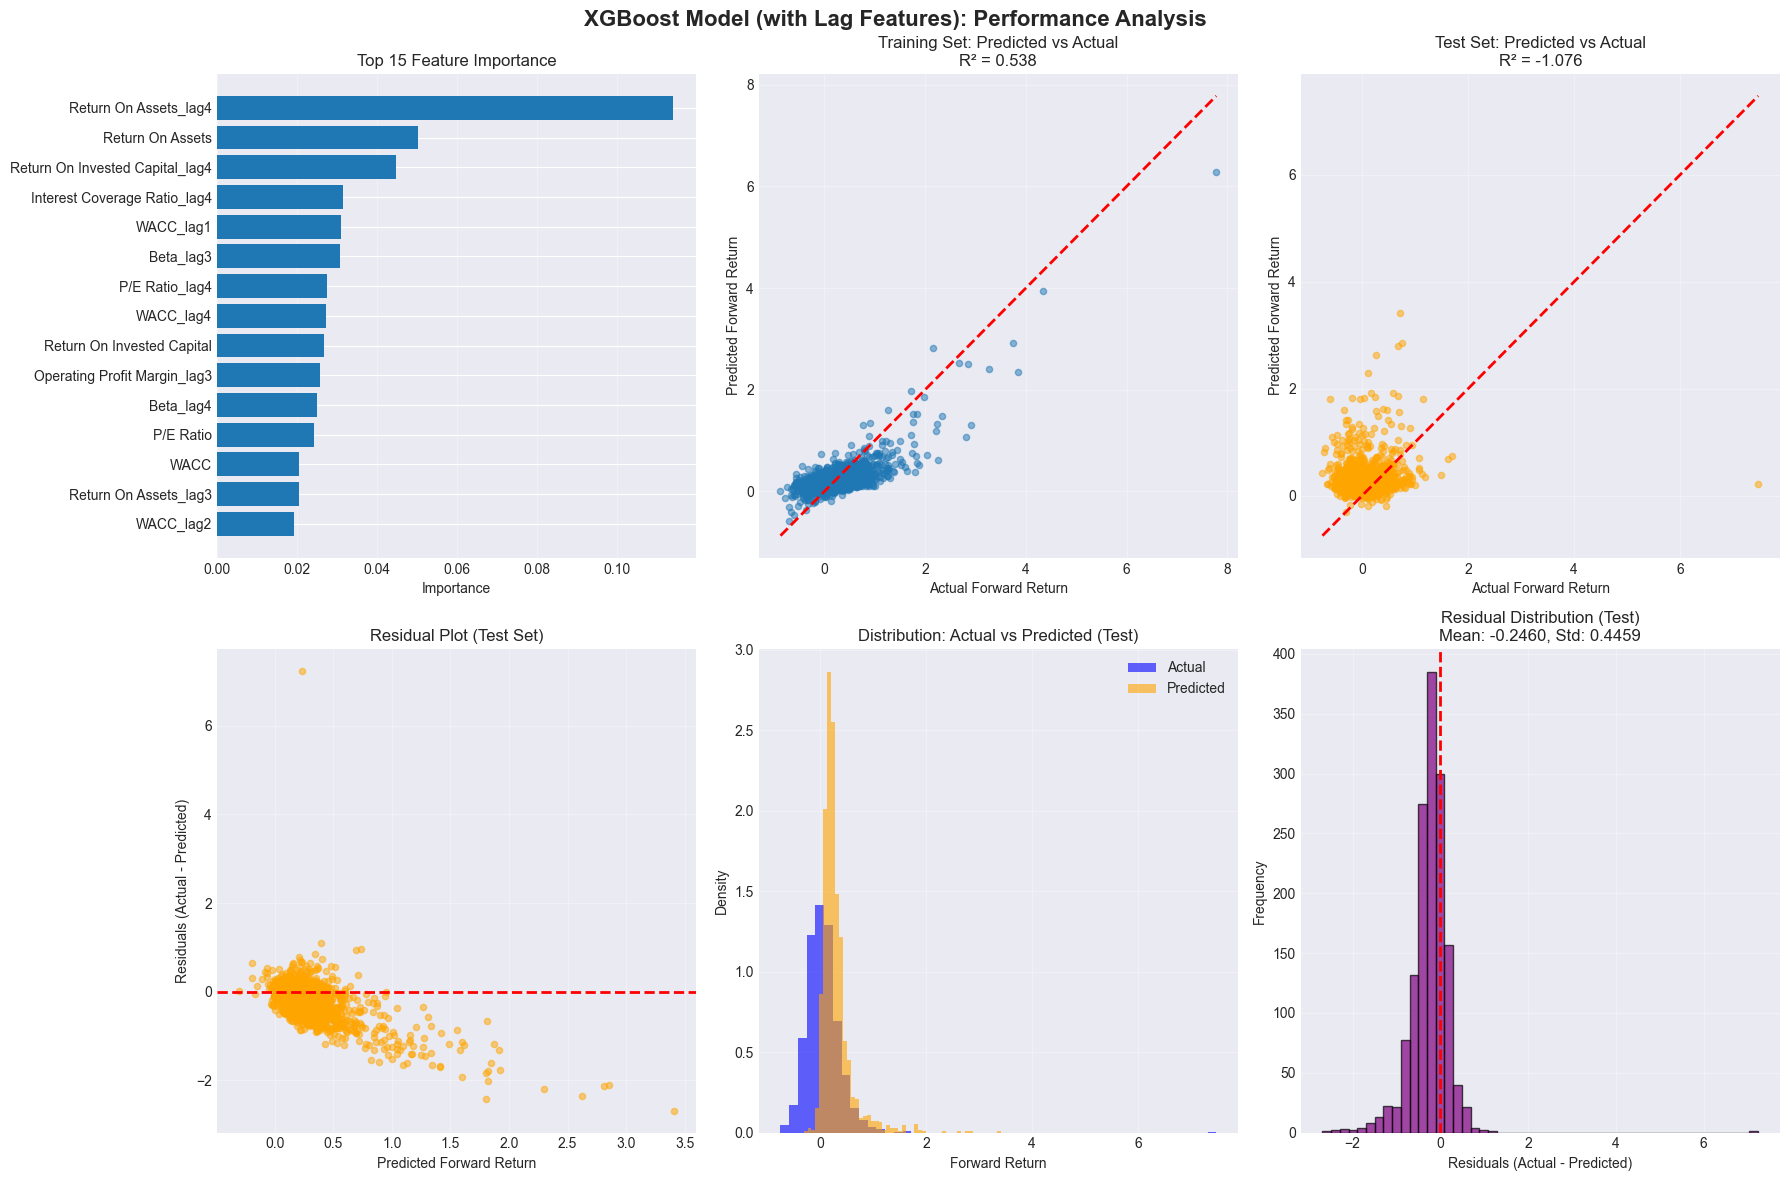

PREDICTION STATISTICS
Test Set:
  Actual Returns - Mean: 0.0593, Std: 0.3535, Range: [-0.7434, 7.4706]
  Predicted Returns - Mean: 0.3053, Std: 0.3050, Range: [-0.3085, 3.4101]
  Residuals - Mean: -0.2460, Std: 0.4459

LAG FEATURE ANALYSIS
Top 10 Most Important Lag Features:
                        Feature  Importance
          Return On Assets_lag4    0.114043
Return On Invested Capital_lag4    0.044789
   Interest Coverage Ratio_lag4    0.031462
                      WACC_lag1    0.031029
                      Beta_lag3    0.030918
                 P/E Ratio_lag4    0.027524
                      WACC_lag4    0.027314
   Operating Profit Margin_lag3    0.025805
                      Beta_lag4    0.025039
          Return On Assets_lag3    0.020473

Total Importance by Lag Period:
  Lag 4: 0.3340
  Lag 1: 0.1626
  Lag 3: 0.1558
  Lag 2: 0.1379



In [184]:
# Visualizations for XGBoost Model with Lag Features
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('XGBoost Model (with Lag Features): Performance Analysis', fontsize=16, fontweight='bold')

# 1. Feature Importance Bar Chart
ax1 = axes[0, 0]
top_features = feat_importance.head(15)  # Show top 15 since we have more features
ax1.barh(range(len(top_features)), top_features['Importance'].values)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['Feature'].values)
ax1.set_xlabel('Importance')
ax1.set_title('Top 15 Feature Importance')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# 2. Predicted vs Actual (Training)
ax2 = axes[0, 1]
ax2.scatter(y_train_cur, y_train_pred, alpha=0.5, s=20)
ax2.plot([y_train_cur.min(), y_train_cur.max()], [y_train_cur.min(), y_train_cur.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Forward Return')
ax2.set_ylabel('Predicted Forward Return')
ax2.set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2:.3f}')
ax2.grid(alpha=0.3)

# 3. Predicted vs Actual (Test)
ax3 = axes[0, 2]
ax3.scatter(y_test_cur, y_test_pred, alpha=0.5, s=20, color='orange')
ax3.plot([y_test_cur.min(), y_test_cur.max()], [y_test_cur.min(), y_test_cur.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Forward Return')
ax3.set_ylabel('Predicted Forward Return')
ax3.set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2:.3f}')
ax3.grid(alpha=0.3)

# 4. Residual Plot (Test)
ax4 = axes[1, 0]
residuals_test = y_test_cur - y_test_pred
ax4.scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='orange')
ax4.axhline(y=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Forward Return')
ax4.set_ylabel('Residuals (Actual - Predicted)')
ax4.set_title('Residual Plot (Test Set)')
ax4.grid(alpha=0.3)

# 5. Distribution Comparison
ax5 = axes[1, 1]
ax5.hist(y_test_cur, bins=50, alpha=0.6, label='Actual', density=True, color='blue')
ax5.hist(y_test_pred, bins=50, alpha=0.6, label='Predicted', density=True, color='orange')
ax5.set_xlabel('Forward Return')
ax5.set_ylabel('Density')
ax5.set_title('Distribution: Actual vs Predicted (Test)')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Residual Distribution
ax6 = axes[1, 2]
ax6.hist(residuals_test, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax6.axvline(x=0, color='r', linestyle='--', lw=2)
ax6.set_xlabel('Residuals (Actual - Predicted)')
ax6.set_ylabel('Frequency')
ax6.set_title(f'Residual Distribution (Test)\nMean: {residuals_test.mean():.4f}, Std: {residuals_test.std():.4f}')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"{'='*60}")
print("PREDICTION STATISTICS")
print(f"{'='*60}")
print(f"Test Set:")
print(f"  Actual Returns - Mean: {y_test_cur.mean():.4f}, Std: {y_test_cur.std():.4f}, Range: [{y_test_cur.min():.4f}, {y_test_cur.max():.4f}]")
print(f"  Predicted Returns - Mean: {y_test_pred.mean():.4f}, Std: {y_test_pred.std():.4f}, Range: [{y_test_pred.min():.4f}, {y_test_pred.max():.4f}]")
print(f"  Residuals - Mean: {residuals_test.mean():.4f}, Std: {residuals_test.std():.4f}")
print()

# Optional: Show which lag periods are most important
print(f"{'='*60}")
print("LAG FEATURE ANALYSIS")
print(f"{'='*60}")
lag_feat_importance = feat_importance[feat_importance['Feature'].str.contains('_lag')].copy()
if len(lag_feat_importance) > 0:
    print("Top 10 Most Important Lag Features:")
    print(lag_feat_importance.head(10).to_string(index=False))
    print()
    
    # Count importance by lag period
    lag_feat_importance['Lag_Period'] = lag_feat_importance['Feature'].str.extract(r'_lag(\d+)').astype(int)
    lag_summary = lag_feat_importance.groupby('Lag_Period')['Importance'].sum().sort_values(ascending=False)
    print("Total Importance by Lag Period:")
    for lag_period, total_importance in lag_summary.items():
        print(f"  Lag {lag_period}: {total_importance:.4f}")
    print()

In [263]:
# Try Ridge Regression - simpler linear model that might generalize better
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print(f"{'='*60}")
print("TRAINING MODEL 3: RIDGE REGRESSION")
print(f"{'='*60}")

# Ridge works better with standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try Ridge with cross-validation to find best alpha
print("Finding best regularization parameter (alpha)...")
ridge = Ridge(random_state=42)
alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
grid_search = GridSearchCV(ridge, {'alpha': alphas}, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha (regularization strength): {best_alpha}")
print()

# Train with best alpha
ridge_model = Ridge(alpha=best_alpha, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Metrics
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"{'='*60}")
print("MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"{'Metric':<20} {'Training':<15} {'Test':<15}")
print(f"{'-'*50}")
print(f"{'RMSE':<20} {train_rmse_ridge:<15.4f} {test_rmse_ridge:<15.4f}")
print(f"{'MAE':<20} {train_mae_ridge:<15.4f} {test_mae_ridge:<15.4f}")
print(f"{'R² Score':<20} {train_r2_ridge:<15.4f} {test_r2_ridge:<15.4f}")
print()

# Feature importance (coefficients)
print(f"{'='*60}")
print("TOP 10 MOST IMPORTANT FEATURES (by absolute coefficient)")
print(f"{'='*60}")
feature_coefs = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': ridge_model.coef_
})
feature_coefs['Abs_Coefficient'] = feature_coefs['Coefficient'].abs()
feature_coefs = feature_coefs.sort_values('Abs_Coefficient', ascending=False)
print(feature_coefs.head(10).to_string(index=False))
print()



TRAINING MODEL 3: RIDGE REGRESSION
Finding best regularization parameter (alpha)...
Best alpha (regularization strength): 100.0

MODEL PERFORMANCE
Metric               Training        Test           
--------------------------------------------------
RMSE                 0.3187          0.3302         
MAE                  0.2364          0.2601         
R² Score             0.0345          -0.2725        

TOP 10 MOST IMPORTANT FEATURES (by absolute coefficient)
                   Feature  Coefficient  Abs_Coefficient
   Operating Profit Margin    -0.043056         0.043056
                 P/S Ratio     0.029994         0.029994
                      Beta     0.028050         0.028050
          Return On Assets     0.015969         0.015969
             Current Ratio     0.012539         0.012539
       Gross Profit Margin     0.011947         0.011947
                      WACC     0.011379         0.011379
   Interest Coverage Ratio    -0.006803         0.006803
          Return On

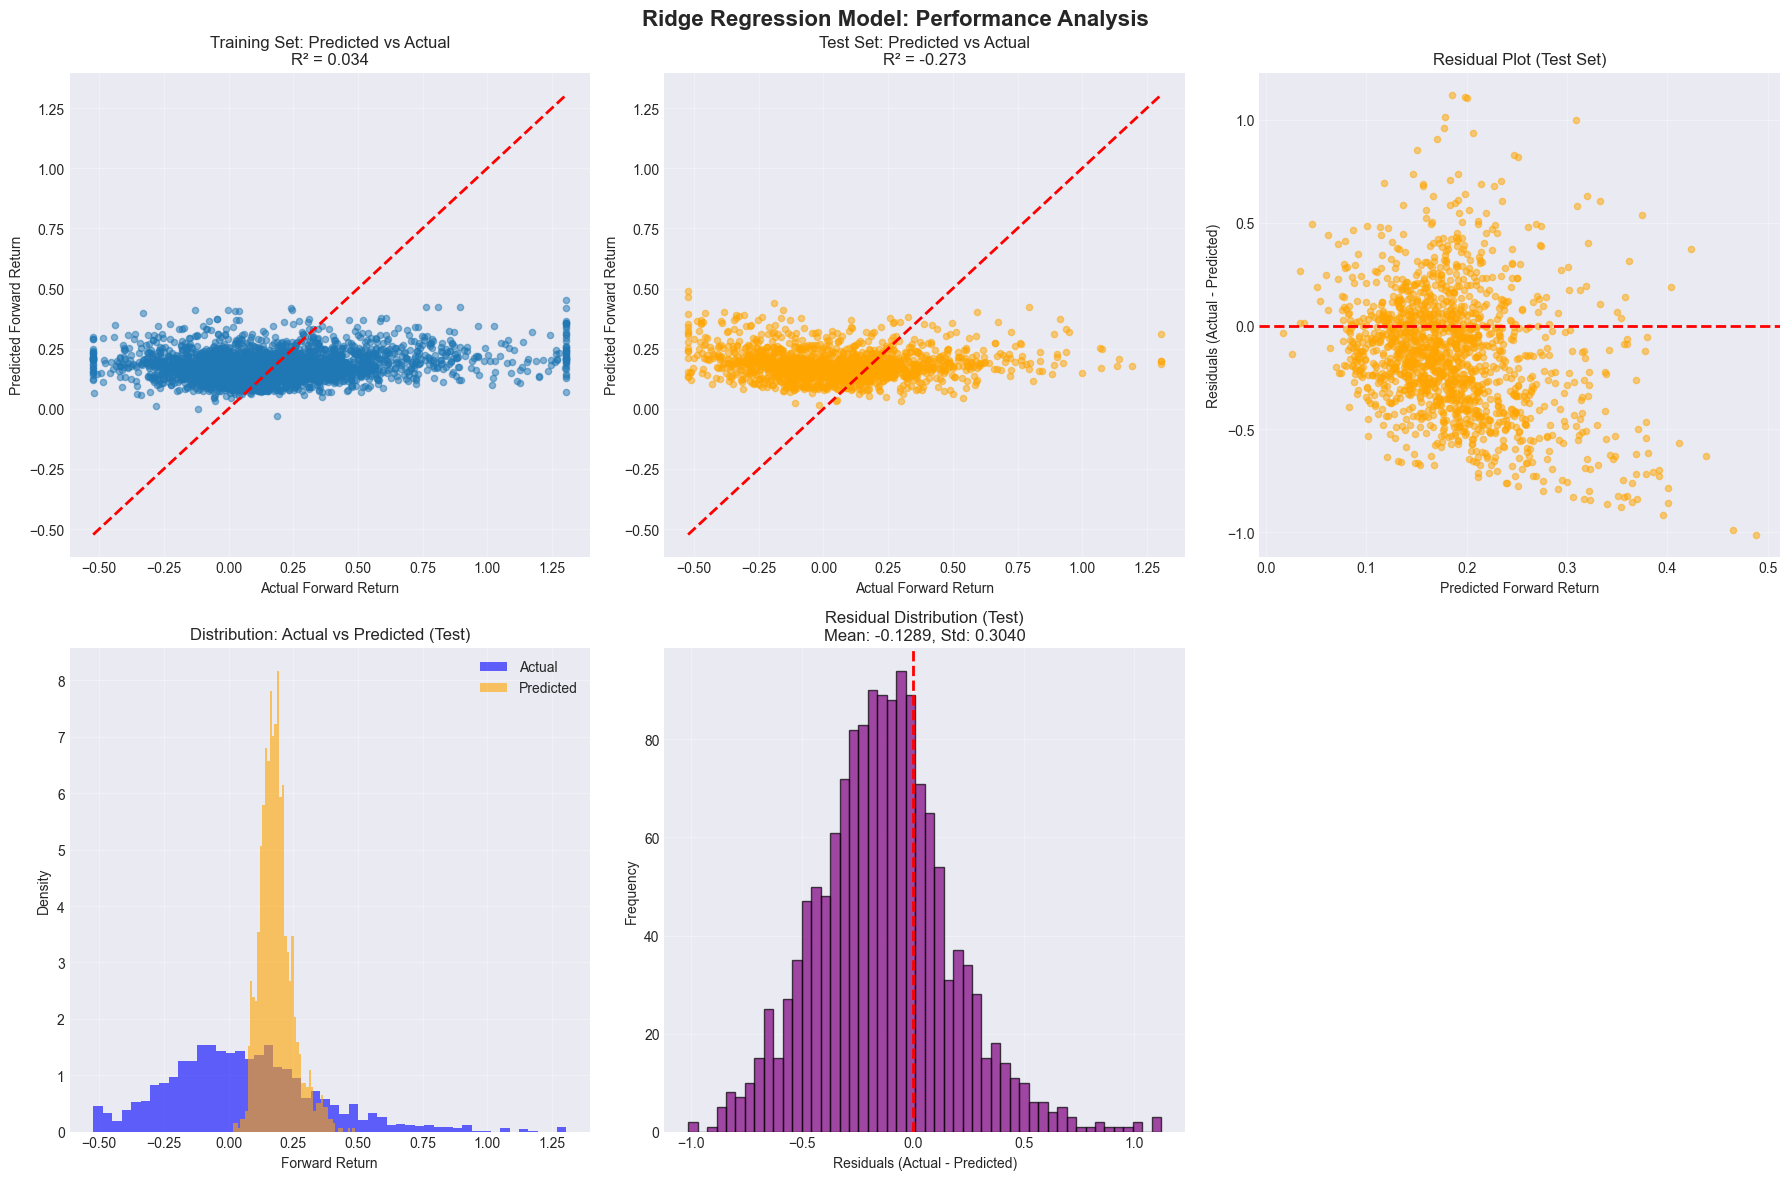

PREDICTION STATISTICS
Test Set:
  Actual Returns - Mean: 0.0559, Std: 0.2927, Range: [-0.5232, 1.3054]
  Predicted Returns - Mean: 0.1848, Std: 0.0639, Range: [0.0169, 0.4883]
  Residuals - Mean: -0.1289, Std: 0.3040



In [264]:
# Visualizations for Ridge Regression Model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Ridge Regression Model: Performance Analysis', fontsize=16, fontweight='bold')

# Convert y_train to numpy array to ensure it matches y_train_pred_ridge length
y_train_array = np.array(y_train).ravel() if hasattr(y_train, 'values') else np.array(y_train)
y_test_array = np.array(y_test).ravel() if hasattr(y_test, 'values') else np.array(y_test)

# Ensure lengths match
assert len(y_train_array) == len(y_train_pred_ridge), f"Length mismatch: y_train={len(y_train_array)}, y_train_pred_ridge={len(y_train_pred_ridge)}"
assert len(y_test_array) == len(y_test_pred_ridge), f"Length mismatch: y_test={len(y_test_array)}, y_test_pred_ridge={len(y_test_pred_ridge)}"

# 1. Predicted vs Actual (Training)
ax2 = axes[0, 0]
ax2.scatter(y_train_array, y_train_pred_ridge, alpha=0.5, s=20)
ax2.plot([y_train_array.min(), y_train_array.max()], [y_train_array.min(), y_train_array.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Forward Return')
ax2.set_ylabel('Predicted Forward Return')
ax2.set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2_ridge:.3f}')
ax2.grid(alpha=0.3)

# 2. Predicted vs Actual (Test)
ax3 = axes[0, 1]
ax3.scatter(y_test_array, y_test_pred_ridge, alpha=0.5, s=20, color='orange')
ax3.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Forward Return')
ax3.set_ylabel('Predicted Forward Return')
ax3.set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2_ridge:.3f}')
ax3.grid(alpha=0.3)

# 3. Residual Plot (Test)
ax4 = axes[0, 2]
residuals_test_ridge = y_test_array - y_test_pred_ridge
ax4.scatter(y_test_pred_ridge, residuals_test_ridge, alpha=0.5, s=20, color='orange')
ax4.axhline(y=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Forward Return')
ax4.set_ylabel('Residuals (Actual - Predicted)')
ax4.set_title('Residual Plot (Test Set)')
ax4.grid(alpha=0.3)

# 4. Distribution Comparison
ax5 = axes[1, 0]
ax5.hist(y_test_array, bins=50, alpha=0.6, label='Actual', density=True, color='blue')
ax5.hist(y_test_pred_ridge, bins=50, alpha=0.6, label='Predicted', density=True, color='orange')
ax5.set_xlabel('Forward Return')
ax5.set_ylabel('Density')
ax5.set_title('Distribution: Actual vs Predicted (Test)')
ax5.legend()
ax5.grid(alpha=0.3)

# 5. Residual Distribution
ax6 = axes[1, 1]
ax6.hist(residuals_test_ridge, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax6.axvline(x=0, color='r', linestyle='--', lw=2)
ax6.set_xlabel('Residuals (Actual - Predicted)')
ax6.set_ylabel('Frequency')
ax6.set_title(f'Residual Distribution (Test)\nMean: {residuals_test_ridge.mean():.4f}, Std: {residuals_test_ridge.std():.4f}')
ax6.grid(alpha=0.3)

# Hide the last subplot (axes[1, 2])
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"{'='*60}")
print("PREDICTION STATISTICS")
print(f"{'='*60}")
print(f"Test Set:")
print(f"  Actual Returns - Mean: {y_test_array.mean():.4f}, Std: {y_test_array.std():.4f}, Range: [{y_test_array.min():.4f}, {y_test_array.max():.4f}]")
print(f"  Predicted Returns - Mean: {y_test_pred_ridge.mean():.4f}, Std: {y_test_pred_ridge.std():.4f}, Range: [{y_test_pred_ridge.min():.4f}, {y_test_pred_ridge.max():.4f}]")
print(f"  Residuals - Mean: {residuals_test_ridge.mean():.4f}, Std: {residuals_test_ridge.std():.4f}")
print()